<a href="https://colab.research.google.com/github/rtj456/Tugas-Coding-RahmaTul-Jannah/blob/main/phyton_pph_rahma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

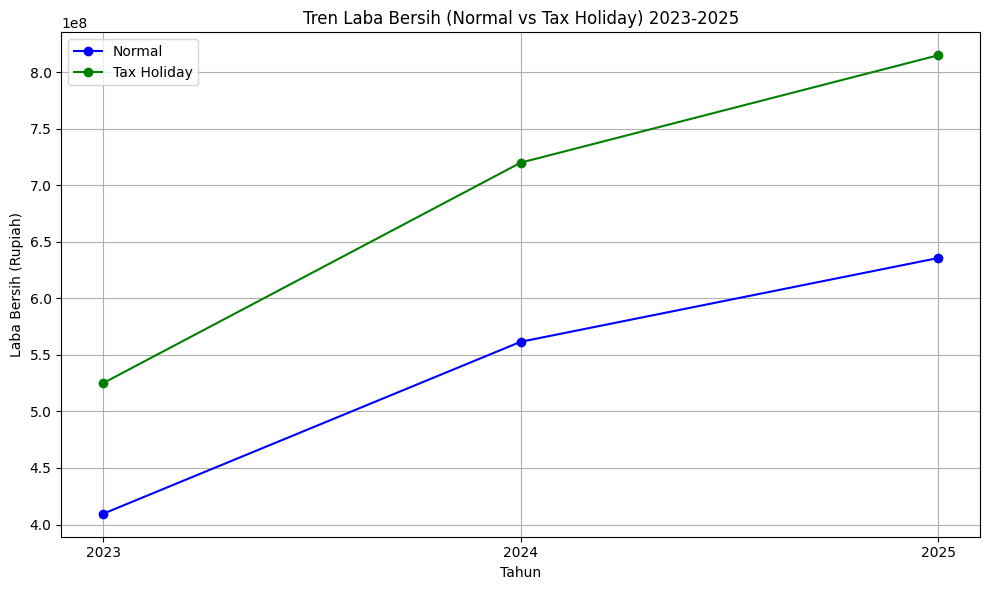

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames from provided CSV data
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['normal', 'tax_holiday', 'normal', 'tax_holiday', 'normal', 'tax_holiday']
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}

transaksi = pd.DataFrame(transaksi_data)
kebijakan = pd.DataFrame(kebijakan_data)

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(kebijakan[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit
transaksi['laba_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'tax_holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']:
        transaksi.at[index, 'laba_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        transaksi.at[index, 'laba_bersih'] = row['laba_kotor'] * (1 - row['tax_rate'])  # Apply tax rate

# Prepare data for plotting
normal_data = transaksi[transaksi['skenario'] == 'normal'][['tahun', 'laba_bersih']].sort_values('tahun')
tax_holiday_data = transaksi[transaksi['skenario'] == 'tax_holiday'][['tahun', 'laba_bersih']].sort_values('tahun')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(normal_data['tahun'], normal_data['laba_bersih'], marker='o', label='Normal', color='blue')
plt.plot(tax_holiday_data['tahun'], tax_holiday_data['laba_bersih'], marker='o', label='Tax Holiday', color='green')
plt.title('Tren Laba Bersih (Normal vs Tax Holiday) 2023-2025')
plt.xlabel('Tahun')
plt.ylabel('Laba Bersih (Rupiah)')
plt.grid(True)
plt.legend()
plt.xticks(normal_data['tahun'].astype(int))  # Ensure years are integers
plt.tight_layout()

# Save the plot
plt.savefig('net_profit_trend.png')

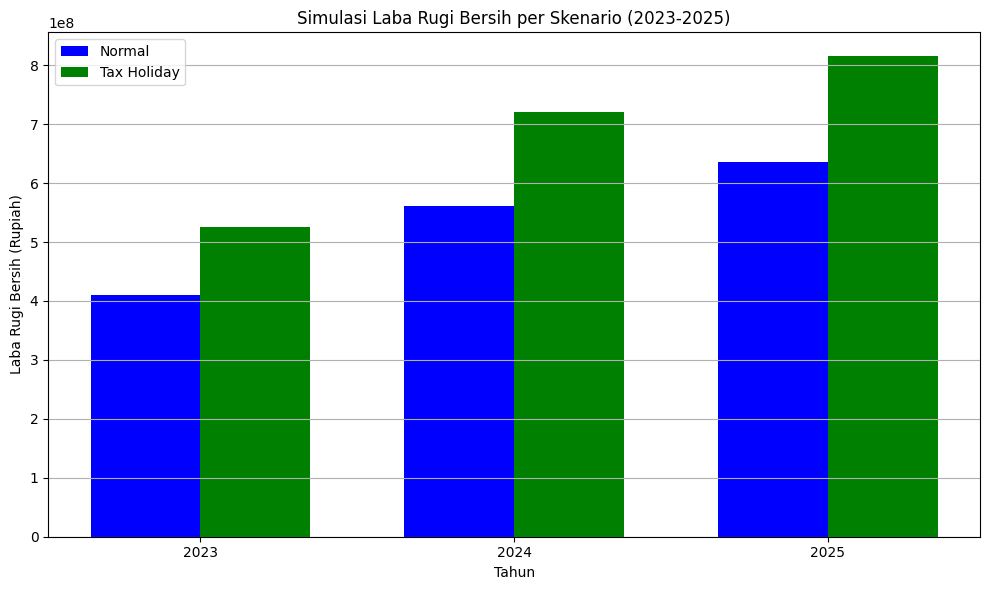

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrames from provided CSV data
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['normal', 'tax_holiday', 'normal', 'tax_holiday', 'normal', 'tax_holiday']
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}

transaksi = pd.DataFrame(transaksi_data)
kebijakan = pd.DataFrame(kebijakan_data)

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(kebijakan[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit/loss
transaksi['laba_rugi_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'tax_holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor'] * (1 - row['tax_rate'])  # Apply tax rate

# Prepare data for plotting
years = sorted(transaksi['tahun'].unique())
normal_profits = transaksi[transaksi['skenario'] == 'normal'][['tahun', 'laba_rugi_bersih']].set_index('tahun')['laba_rugi_bersih']
tax_holiday_profits = transaksi[transaksi['skenario'] == 'tax_holiday'][['tahun', 'laba_rugi_bersih']].set_index('tahun')['laba_rugi_bersih']

# Plotting bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(years))

plt.bar(index, normal_profits, bar_width, label='Normal', color='blue')
plt.bar(index + bar_width, tax_holiday_profits, bar_width, label='Tax Holiday', color='green')

plt.xlabel('Tahun')
plt.ylabel('Laba Rugi Bersih (Rupiah)')
plt.title('Simulasi Laba Rugi Bersih per Skenario (2023-2025)')
plt.xticks(index + bar_width / 2, years)
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()

# Save the plot
plt.savefig('profit_loss_simulation.png')
plt.show()

Simulasi Laba/Rugi per Skenario (dalam Rupiah):
skenario       normal  tax_holiday
tahun                             
2023      409500000.0  525000000.0
2024      561600000.0  720000000.0
2025      635700000.0  815000000.0


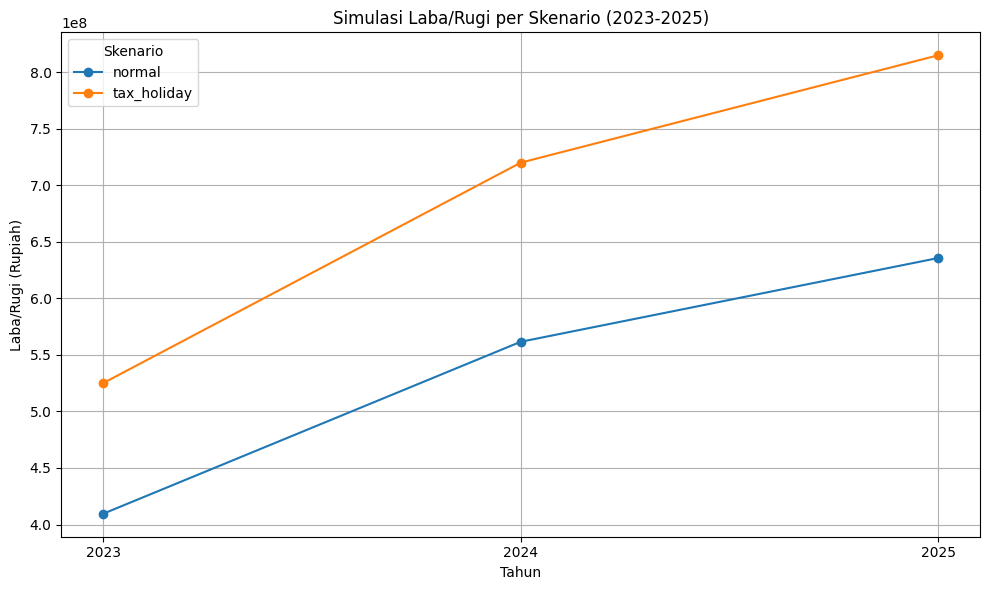


Hasil simulasi tabel pivot telah ditampilkan.
Grafik simulasi telah disimpan ke 'simulasi_laba_rugi.png'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrames from provided CSV data
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['normal', 'tax_holiday', 'normal', 'tax_holiday', 'normal', 'tax_holiday']
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}

transaksi = pd.DataFrame(transaksi_data)
kebijakan = pd.DataFrame(kebijakan_data)

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(kebijakan[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit/loss
transaksi['laba_rugi_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'tax_holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor'] * (1 - row['tax_rate'])  # Apply tax rate

# Prepare data for plotting
years = sorted(transaksi['tahun'].unique())
normal_profits = transaksi[transaksi['skenario'] == 'normal'][['tahun', 'laba_rugi_bersih']].set_index('tahun')['laba_rugi_bersih']
tax_holiday_profits = transaksi[transaksi['skenario'] == 'tax_holiday'][['tahun', 'laba_rugi_bersih']].set_index('tahun')['laba_rugi_bersih']

# 1. Membuat tabel pivot untuk laba/rugi per skenario dan tahun
# Use the 'transaksi' DataFrame directly, not read from a file
pivot_table = transaksi.pivot_table(values='laba_rugi_bersih', index='tahun', columns='skenario', aggfunc='sum') # Use the calculated 'laba_rugi_bersih' column

# 2. Menampilkan tabel laba/rugi
print("Simulasi Laba/Rugi per Skenario (dalam Rupiah):") # Adjusted currency unit for clarity
print(pivot_table)

# 3. Visualisasi laba/rugi per skenario
plt.figure(figsize=(10, 6))
for skenario in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[skenario], marker='o', label=skenario)

plt.title('Simulasi Laba/Rugi per Skenario (2023-2025)') # Adjusted year range in title
plt.xlabel('Tahun')
plt.ylabel('Laba/Rugi (Rupiah)') # Adjusted currency unit
plt.legend(title='Skenario')
plt.grid(True)
plt.xticks(pivot_table.index)  # Memastikan tahun ditampilkan sebagai integer
plt.tight_layout()

# Menyimpan grafik ke file
plt.savefig('simulasi_laba_rugi.png')
plt.show()

# 4. Menyimpan hasil tabel ke file CSV (optional, if you want to save the pivot table)
pivot_table.to_csv('simulasi_laba_rugi_pivot.csv') # Use a different filename or ensure you know which file is which

print("\nHasil simulasi tabel pivot telah ditampilkan.") # Adjusted message
print("Grafik simulasi telah disimpan ke 'simulasi_laba_rugi.png'.")
if 'simulasi_laba_rugi_pivot.csv' in locals() or 'simulasi_laba_rugi_pivot.csv' in globals(): # Check if the file was saved
     print("Tabel pivot simulasi telah disimpan ke 'simulasi_laba_rugi_pivot.csv'.")

Simulasi Laba/Rugi per Skenario (dalam Rupiah):
skenario       normal  tax_holiday
tahun                             
2023      409500000.0  525000000.0
2024      561600000.0  720000000.0
2025      635700000.0  815000000.0


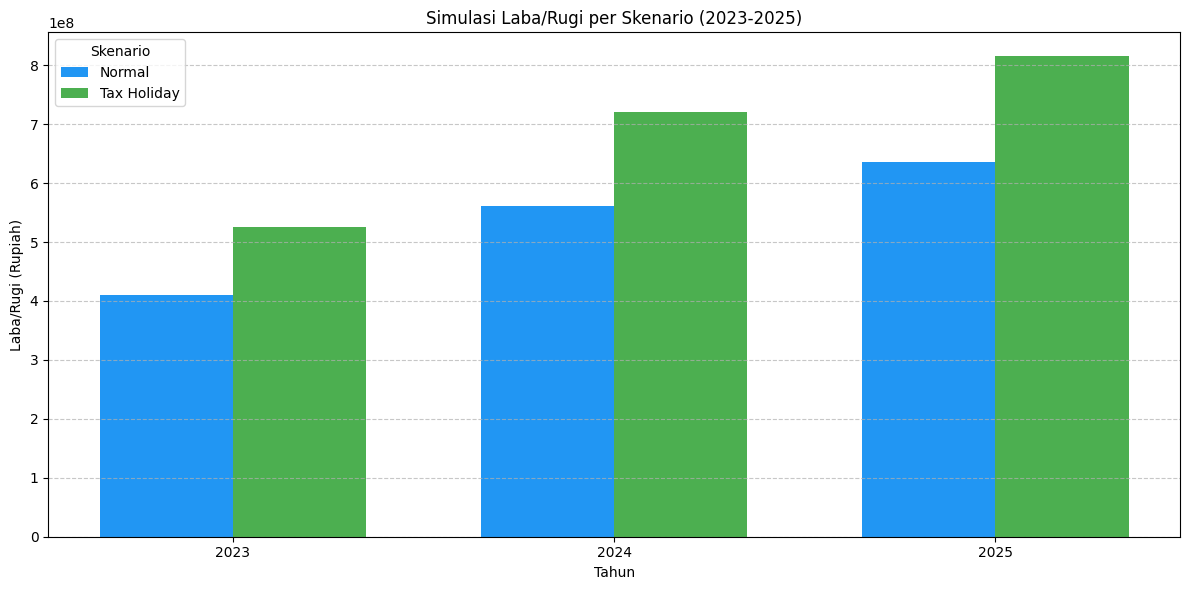


Hasil simulasi tabel pivot telah ditampilkan.
Diagram batang telah disimpan ke 'simulasi_laba_rugi_batang.png'.
Tabel pivot simulasi telah disimpan ke 'simulasi_laba_rugi_pivot.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create DataFrames from provided CSV data
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['normal', 'tax_holiday', 'normal', 'tax_holiday', 'normal', 'tax_holiday']
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}

transaksi = pd.DataFrame(transaksi_data)
kebijakan = pd.DataFrame(kebijakan_data)

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(kebijakan[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit/loss
transaksi['laba_rugi_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'tax_holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor'] * (1 - row['tax_rate'])  # Apply tax rate

# 1. Membuat tabel pivot untuk laba/rugi per skenario dan tahun
# Use the 'transaksi' DataFrame directly, not read from a file
# Also, use 'laba_rugi_bersih' which includes the tax calculation
pivot_table = transaksi.pivot_table(values='laba_rugi_bersih', index='tahun', columns='skenario', aggfunc='sum')

# 2. Menampilkan tabel laba/rugi
print("Simulasi Laba/Rugi per Skenario (dalam Rupiah):")
print(pivot_table)

# 3. Membuat diagram batang
# Pengaturan untuk diagram batang
years = pivot_table.index
scenarios = pivot_table.columns
n_scenarios = len(scenarios)
bar_width = 0.35 # Adjusted bar width slightly for two bars
x = np.arange(len(years))  # Posisi sumbu X untuk tahun

# Membuat figure dan axes
plt.figure(figsize=(12, 6))

# Membuat batang untuk setiap skenario
# Use the actual scenario names from pivot_table.columns
plt.bar(x - bar_width/2, pivot_table['normal'], width=bar_width, label='Normal', color='#2196F3')  # Biru
plt.bar(x + bar_width/2, pivot_table['tax_holiday'], width=bar_width, label='Tax Holiday', color='#4CAF50')  # Hijau


# Mengatur label dan judul
plt.xlabel('Tahun')
plt.ylabel('Laba/Rugi (Rupiah)')
plt.title('Simulasi Laba/Rugi per Skenario (2023-2025)') # Adjusted year range in title
plt.xticks(x, years)  # Menampilkan tahun di sumbu X
plt.legend(title='Skenario')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menyimpan diagram ke file
plt.savefig('simulasi_laba_rugi_batang.png')
plt.show()

# 4. Menyimpan hasil tabel ke file CSV
pivot_table.to_csv('simulasi_laba_rugi_pivot.csv') # Changed filename to avoid confusion

print("\nHasil simulasi tabel pivot telah ditampilkan.")
print("Diagram batang telah disimpan ke 'simulasi_laba_rugi_batang.png'.")
print("Tabel pivot simulasi telah disimpan ke 'simulasi_laba_rugi_pivot.csv'.")

Simulasi Laba/Rugi per Skenario (dalam Rupiah):
skenario       normal  tax_holiday
tahun                             
2023      409500000.0  525000000.0
2024      561600000.0  720000000.0
2025      635700000.0  815000000.0


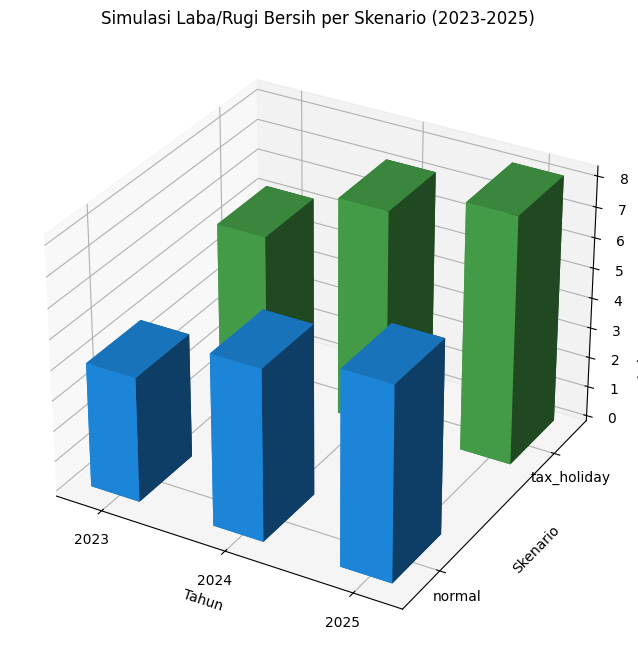


Diagram batang 3D telah disimpan ke 'simulasi_laba_rugi_batang_3d.png'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import modul untuk plot 3D
from mpl_toolkits.mplot3d import Axes3D

# Create DataFrames from provided CSV data (Kode yang sama dari sebelumnya)
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['normal', 'tax_holiday', 'normal', 'tax_holiday', 'normal', 'tax_holiday']
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}

transaksi = pd.DataFrame(transaksi_data)
kebijakan = pd.DataFrame(kebijakan_data)

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(kebijakan[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit/loss
transaksi['laba_rugi_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'tax_holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor'] * (1 - row['tax_rate'])  # Apply tax rate

# 1. Membuat tabel pivot untuk laba/rugi per skenario dan tahun
# Use the 'transaksi' DataFrame directly, not read from a file
# Also, use 'laba_rugi_bersih' which includes the tax calculation
pivot_table = transaksi.pivot_table(values='laba_rugi_bersih', index='tahun', columns='skenario', aggfunc='sum')

# 2. Menampilkan tabel laba/rugi (opsional, jika Anda ingin melihat tabelnya lagi)
print("Simulasi Laba/Rugi per Skenario (dalam Rupiah):")
print(pivot_table)

# 3. Membuat diagram batang 3D
years = pivot_table.index
scenarios = pivot_table.columns
n_years = len(years)
n_scenarios = len(scenarios)

# Membuat figure dan axes untuk plot 3D
fig = plt.figure(figsize=(12, 8))
# Menggunakan 'projection='3d'' untuk membuat sumbu 3D
ax = fig.add_subplot(111, projection='3d')

# Menentukan posisi bar untuk setiap skenario di sumbu X
xpos = np.arange(n_years)
# Menentukan posisi bar untuk setiap tahun di sumbu Y
ypos = np.arange(n_scenarios)

# Membuat grid untuk posisi bar (X, Y)
xpos_grid, ypos_grid = np.meshgrid(xpos, ypos, indexing='ij')
xpos_flat = xpos_grid.flatten()
ypos_flat = ypos_grid.flatten()

# Menentukan tinggi bar (nilai laba rugi bersih)
zpos = 0 # Batang dimulai dari Z=0
# Mengambil nilai laba rugi dari pivot table, diubah menjadi array numpy datar
dz = pivot_table.values.flatten()

# Menentukan warna untuk setiap skenario
colors = ['#2196F3', '#4CAF50'] # Biru untuk Normal, Hijau untuk Tax Holiday
scenario_colors = [colors[i % n_scenarios] for i in range(n_years * n_scenarios)]

# Membuat bar 3D
# Parameters: x, y, z (base position), dx, dy, dz (dimensions)
# dx dan dy menentukan lebar bar di sumbu X dan Y
# dz menentukan tinggi bar
ax.bar3d(xpos_flat,
         ypos_flat,
         zpos,
         dx=0.4,  # Lebar bar di sumbu X
         dy=0.4,  # Lebar bar di sumbu Y
         dz=dz,   # Tinggi bar (laba rugi bersih)
         color=scenario_colors,
         shade=True) # Memberikan efek bayangan

# Mengatur label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Skenario')
ax.set_zlabel('Laba/Rugi Bersih (Rupiah)')
ax.set_title('Simulasi Laba/Rugi Bersih per Skenario (2023-2025)')

# Mengatur tick di sumbu X (Tahun)
ax.set_xticks(xpos + 0.2) # Sesuaikan posisi tick agar di tengah bar
ax.set_xticklabels(years)

# Mengatur tick di sumbu Y (Skenario)
ax.set_yticks(ypos + 0.2) # Sesuaikan posisi tick agar di tengah bar
ax.set_yticklabels(scenarios)

# Menambahkan legenda (ini sedikit tricky di bar3d, tapi bisa dilakukan dengan membuat objek dummy atau anotasi)
# Cara yang lebih umum adalah dengan plot terpisah untuk legenda
# Untuk contoh sederhana ini, kita akan mengandalkan label di tick sumbu Y

# Menyimpan grafik ke file
plt.savefig('simulasi_laba_rugi_batang_3d.png')
plt.show()

print("\nDiagram batang 3D telah disimpan ke 'simulasi_laba_rugi_batang_3d.png'.")

Perbandingan PPh: Normal (Penyusutan CSV), Garis Lurus (Fiskal), Saldo Menurun (Fiskal), dan Tax Holiday (dalam jutaan rupiah):
       PPh_Normal  PPh_Garis_Lurus  PPh_Saldo_Menurun  PPh_Tax_Holiday
tahun                                                                 
2023        115.5            127.6             110.00              0.0
2024        158.4            171.6             158.40              0.0
2025        179.3            193.6             183.92              0.0


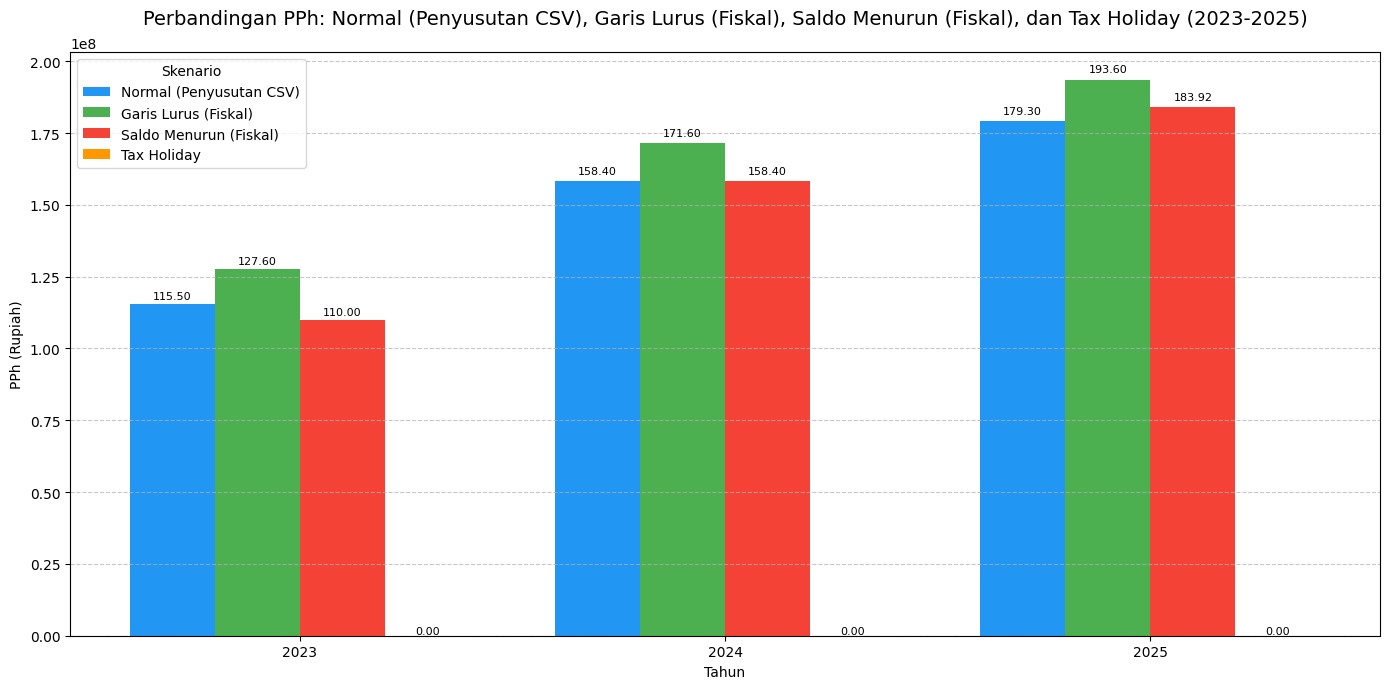

Diagram batang perbandingan PPh telah disimpan ke 'perbandingan_pph_batang.png'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Use provided data to create DataFrames
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['Normal', 'Tax Holiday', 'Normal', 'Tax Holiday', 'Normal', 'Tax Holiday'] # Changed to match 'Normal' in step 2 filter
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}
# Dummy data for aset_tetap if not using CSV
# You'll need to adjust this based on your actual asset data
aset_data = {
    'nama_aset': ['Mesin A', 'Gedung B'],
    'nilai_perolehan': [100000000, 500000000],
    'umur_ekonomis': [5, 10],
    'metode': ['Garis Lurus', 'Saldo Menurun']
}


transaksi = pd.DataFrame(transaksi_data)
aset = pd.DataFrame(aset_data) # Create aset DataFrame
fiskal = pd.DataFrame(kebijakan_data) # Use kebijakan_data for fiskal DataFrame

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(fiskal[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit/loss (This logic already exists and is correct based on scenarios)
transaksi['laba_rugi_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'Tax Holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']: # Use 'Tax Holiday' scenario name
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        # Apply tax rate only if laba_kotor is positive
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor'] * (1 - row['tax_rate']) if row['laba_kotor'] > 0 else row['laba_kotor'] # Still include losses if any

# 2. Filter data for different scenarios for PPh calculation
# Instead of filtering 'Normal' first, we will directly use the calculated laba_rugi_bersih
# for each scenario that is already in the 'transaksi' DataFrame.

# 3. Menghitung penyusutan per aset untuk metode Garis Lurus dan Saldo Menurun
aset_gl = aset[aset['metode'] == 'Garis Lurus'].copy() # Use .copy() to avoid SettingWithCopyWarning
aset_sm = aset[aset['metode'] == 'Saldo Menurun'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Fungsi untuk menghitung penyusutan (Keep these functions, they calculate *accounting* depreciation)
def hitung_penyusutan_gl(nilai_perolehan, umur_ekonomis):
     # Assuming full year depreciation
    return nilai_perolehan / umur_ekonomis

def hitung_penyusutan_sm(nilai_buku, umur_ekonomis):
     # Simplified for example, proper SM requires tracking book value year-over-year
    return (nilai_buku * 2) / umur_ekonomis


# Menghitung penyusutan per tahun untuk semua aset (Keep this, this calculates the *accounting* depreciation)
tahun_range = sorted(transaksi['tahun'].unique()) # Use years from your data

penyusutan_gl_per_tahun = {tahun: 0 for tahun in tahun_range}
penyusutan_sm_per_tahun = {tahun: 0 for tahun in tahun_range}

# Calculate total annual GL depreciation
for _, row in aset_gl.iterrows():
    penyusutan_tahunan = hitung_penyusutan_gl(row['nilai_perolehan'], row['umur_ekonomis'])
    for tahun in tahun_range:
        # Assuming the asset exists for the full year
        penyusutan_gl_per_tahun[tahun] += penyusutan_tahunan

# Calculate annual SM depreciation, tracking book value
for _, row in aset_sm.iterrows():
    nilai_buku = row['nilai_perolehan']
    for tahun in tahun_range:
        # Check if the asset is still within its economic life
        if nilai_buku > 1: # Assume depreciation stops when book value is near zero
             penyusutan_tahunan = hitung_penyusutan_sm(nilai_buku, row['umur_ekonomis'])
             penyusutan_sm_per_tahun[tahun] += penyusutan_tahunan
             nilai_buku -= penyusutan_tahunan
        else:
             penyusutan_sm_per_tahun[tahun] += 0 # No depreciation if fully depreciated


# 4. Menghitung PPh untuk skenario Normal, Garis Lurus, Saldo Menurun, dan Tax Holiday
# PPh is usually calculated as Taxable Profit * Tax Rate.
# In your original data, 'laba_rugi_bersih' already accounts for tax.
# PPh paid in the 'Normal' scenario is (laba_kotor - laba_rugi_bersih) for positive laba_kotor.
# PPh paid in 'Tax Holiday' scenario is 0 during holiday, and (laba_kotor - laba_rugi_bersih) otherwise.
# For GL and SM scenarios, PPh would be calculated based on Taxable Profit (Pendapatan - Beban - *Fiscal* Depreciation) * Tax Rate.
# Assuming your provided 'penyusutan' in transaksi is the 'Normal' scenario's *fiscal* depreciation.

result = []
for tahun in tahun_range:
    # Get financial data for this year for both Normal and Tax Holiday scenarios
    transaksi_normal_year = transaksi[(transaksi['tahun'] == tahun) & (transaksi['skenario'] == 'Normal')]
    transaksi_th_year = transaksi[(transaksi['tahun'] == tahun) & (transaksi['skenario'] == 'Tax Holiday')]

    if transaksi_normal_year.empty or transaksi_th_year.empty:
        # Handle cases where data is missing for a year/scenario
        continue

    pendapatan = transaksi_normal_year['pendapatan'].iloc[0] # Assuming pendapatan is the same across scenarios for a year
    beban_operasional = transaksi_normal_year['beban_operasional'].iloc[0] # Assuming beban_operasional is the same

    # Ambil tax rate dan periode tax holiday
    fiskal_tahun = fiskal[fiskal['tahun'] == tahun]
    if fiskal_tahun.empty:
        continue

    tax_rate = fiskal_tahun['tax_rate'].iloc[0]
    tax_holiday_awal = fiskal_tahun['tax_holiday_awal'].iloc[0]
    tax_holiday_akhir = fiskal_tahun['tax_holiday_akhir'].iloc[0]

    # Calculate PPh based on the definition: PPh = Taxable Profit * Tax Rate (if Taxable Profit > 0)

    # Skenario Normal (using the 'penyusutan' from the original data as fiscal depreciation)
    penyusutan_normal_fiscal = transaksi_normal_year['penyusutan'].iloc[0]
    laba_kena_pajak_normal = pendapatan - beban_operasional - penyusutan_normal_fiscal
    pph_normal = laba_kena_pajak_normal * tax_rate if laba_kena_pajak_normal > 0 else 0

    # Skenario Garis Lurus (using the calculated GL depreciation as fiscal depreciation)
    penyusutan_gl_fiscal = penyusutan_gl_per_tahun.get(tahun, 0)
    laba_kena_pajak_gl = pendapatan - beban_operasional - penyusutan_gl_fiscal
    pph_gl = laba_kena_pajak_gl * tax_rate if laba_kena_pajak_gl > 0 else 0

    # Skenario Saldo Menurun (using the calculated SM depreciation as fiscal depreciation)
    penyusutan_sm_fiscal = penyusutan_sm_per_tahun.get(tahun, 0)
    laba_kena_pajak_sm = pendapatan - beban_operasional - penyusutan_sm_fiscal
    pph_sm = laba_kena_pajak_sm * tax_rate if laba_kena_pajak_sm > 0 else 0

    # Skenario Tax Holiday (Taxable Profit is same as Normal, but PPh is 0 during holiday period)
    pph_th = 0 if tax_holiday_awal <= tahun <= tax_holiday_akhir else pph_normal # PPh is 0 during holiday, otherwise same as Normal PPh

    result.append({
        'tahun': tahun,
        'PPh_Normal': pph_normal,
        'PPh_Garis_Lurus': pph_gl,
        'PPh_Saldo_Menurun': pph_sm,
        'PPh_Tax_Holiday': pph_th
    })

# 5. Membuat DataFrame hasil
df_result = pd.DataFrame(result)
# Convert to millions for printing only, keep original values for plotting
df_result_milions = df_result.copy()
for col in ['PPh_Normal', 'PPh_Garis_Lurus', 'PPh_Saldo_Menurun', 'PPh_Tax_Holiday']:
    df_result_milions[col] = df_result_milions[col] / 1_000_000

print("Perbandingan PPh: Normal (Penyusutan CSV), Garis Lurus (Fiskal), Saldo Menurun (Fiskal), dan Tax Holiday (dalam jutaan rupiah):")
print(df_result_milions.set_index('tahun'))

# 6. Menyimpan hasil ke CSV (optional)
# df_result.to_csv('perbandingan_pph.csv', index=False)
# print("\nHasil perbandingan PPh telah disimpan ke 'perbandingan_pph.csv'.")

# 7. Membuat diagram batang
plt.figure(figsize=(14, 7))
bar_width = 0.2
x = np.arange(len(df_result['tahun']))

# Plot batang untuk setiap skenario (using original large values for accurate plotting)
plt.bar(x - bar_width*1.5, df_result['PPh_Normal'], width=bar_width, label='Normal (Penyusutan CSV)', color='#2196F3')
plt.bar(x - bar_width*0.5, df_result['PPh_Garis_Lurus'], width=bar_width, label='Garis Lurus (Fiskal)', color='#4CAF50')
plt.bar(x + bar_width*0.5, df_result['PPh_Saldo_Menurun'], width=bar_width, label='Saldo Menurun (Fiskal)', color='#F44336')
plt.bar(x + bar_width*1.5, df_result['PPh_Tax_Holiday'], width=bar_width, label='Tax Holiday', color='#FF9800')

# Anotasi nilai di atas batang (use millions for display)
for i, tahun in enumerate(df_result['tahun']):
    for j, col in enumerate(['PPh_Normal', 'PPh_Garis_Lurus', 'PPh_Saldo_Menurun', 'PPh_Tax_Holiday']):
        value = df_result_milions[col].iloc[i] # Use millions DataFrame for text display
        plt.text(i + (bar_width * (j - 1.5)), # Adjust text position based on bar index
                 df_result[col].iloc[i] + (df_result[col].iloc[i] * 0.01), # Position text slightly above the bar using original value
                 f'{value:.2f}', ha='center', va='bottom', fontsize=8)

# Pengaturan diagram
plt.xlabel('Tahun')
plt.ylabel('PPh (Rupiah)') # Changed back to Rupiah as values are large
plt.title('Perbandingan PPh: Normal (Penyusutan CSV), Garis Lurus (Fiskal), Saldo Menurun (Fiskal), dan Tax Holiday (2023-2025)', fontsize=14, pad=20) # Adjusted year range and title
plt.xticks(x, df_result['tahun'])
plt.legend(title='Skenario', loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menyimpan diagram
plt.savefig('perbandingan_pph_batang.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diagram batang perbandingan PPh telah disimpan ke 'perbandingan_pph_batang.png'.")

Perbandingan PPh: Normal (Penyusutan CSV), Garis Lurus (Fiskal), Saldo Menurun (Fiskal), dan Tax Holiday (dalam jutaan rupiah):
       PPh_Normal  PPh_Garis_Lurus  PPh_Saldo_Menurun  PPh_Tax_Holiday
tahun                                                                 
2023        115.5            127.6             110.00              0.0
2024        158.4            171.6             158.40              0.0
2025        179.3            193.6             183.92              0.0


<ipython-input-23-857a03fb899a>:251: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout() # Menyesuaikan layout


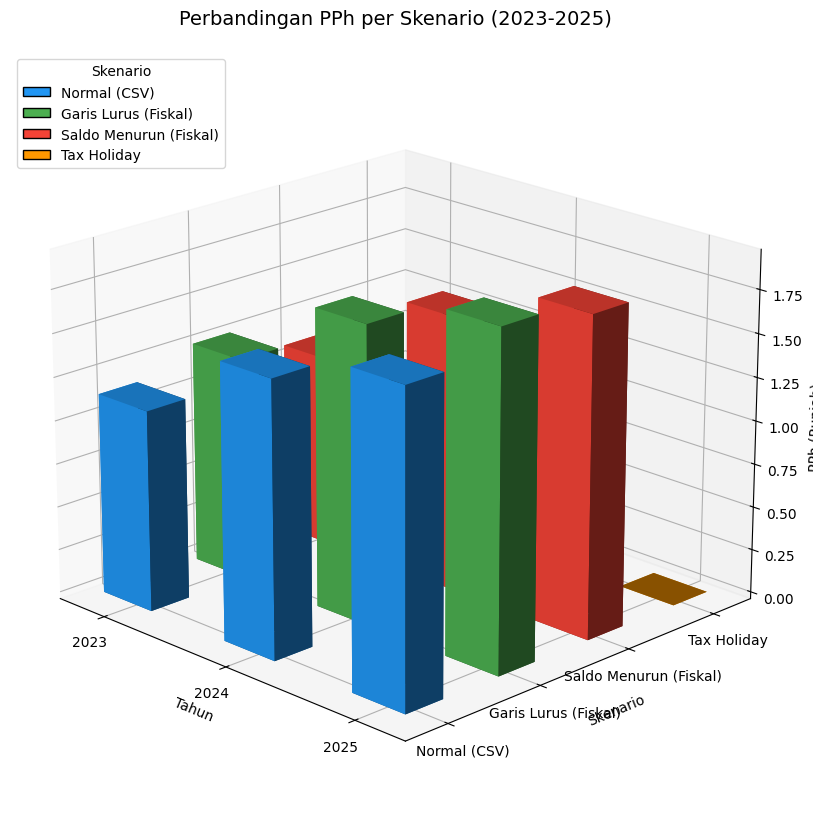


Diagram batang 3D perbandingan PPh telah disimpan ke 'perbandingan_pph_batang_3d.png'.
Hasil perbandingan PPh telah disimpan ke 'perbandingan_pph_simulasi.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import modul untuk plot 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch # Import Patch for proxy artists

# Create DataFrames from provided CSV data (Kode yang sama dari sebelumnya)
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['Normal', 'Tax Holiday', 'Normal', 'Tax Holiday', 'Normal', 'Tax Holiday'] # Changed to match 'Normal' in step 2 filter
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}
# Dummy data for aset_tetap if not using CSV
# You'll need to adjust this based on your actual asset data
aset_data = {
    'nama_aset': ['Mesin A', 'Gedung B'],
    'nilai_perolehan': [100000000, 500000000],
    'umur_ekonomis': [5, 10],
    'metode': ['Garis Lurus', 'Saldo Menurun']
}


transaksi = pd.DataFrame(transaksi_data)
aset = pd.DataFrame(aset_data) # Create aset DataFrame
fiskal = pd.DataFrame(kebijakan_data) # Use kebijakan_data for fiskal DataFrame

# Calculate gross profit
transaksi['laba_kotor'] = transaksi['pendapatan'] - transaksi['beban_operasional'] - transaksi['penyusutan']

# Merge with kebijakan data
transaksi = transaksi.merge(fiskal[['tahun', 'tax_rate', 'tax_holiday_awal', 'tax_holiday_akhir']], on='tahun', how='left')

# Calculate net profit/loss (This logic already exists and is correct based on scenarios)
transaksi['laba_rugi_bersih'] = 0.0
for index, row in transaksi.iterrows():
    if row['skenario'] == 'Tax Holiday' and row['tahun'] >= row['tax_holiday_awal'] and row['tahun'] <= row['tax_holiday_akhir']: # Use 'Tax Holiday' scenario name
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor']  # No tax during tax holiday
    else:
        # Apply tax rate only if laba_kotor is positive
        transaksi.at[index, 'laba_rugi_bersih'] = row['laba_kotor'] * (1 - row['tax_rate']) if row['laba_kotor'] > 0 else row['laba_kotor'] # Still include losses if any

# 2. Filter data for different scenarios for PPh calculation
# Instead of filtering 'Normal' first, we will directly use the calculated laba_rugi_bersih
# for each scenario that is already in the 'transaksi' DataFrame.

# 3. Menghitung penyusutan per aset untuk metode Garis Lurus dan Saldo Menurun
aset_gl = aset[aset['metode'] == 'Garis Lurus'].copy() # Use .copy() to avoid SettingWithCopyWarning
aset_sm = aset[aset['metode'] == 'Saldo Menurun'].copy() # Use .copy() to avoid SettingWithCopyWarning

# Fungsi untuk menghitung penyusutan (Keep these functions, they calculate *accounting* depreciation)
def hitung_penyusutan_gl(nilai_perolehan, umur_ekonomis):
     # Assuming full year depreciation
    return nilai_perolehan / umur_ekonomis

def hitung_penyusutan_sm(nilai_buku, umur_ekonomis):
     # Simplified for example, proper SM requires tracking book value year-over-year
    return (nilai_buku * 2) / umur_ekonomis


# Menghitung penyusutan per tahun untuk semua aset (Keep this, this calculates the *accounting* depreciation)
tahun_range = sorted(transaksi['tahun'].unique()) # Use years from your data

penyusutan_gl_per_tahun = {tahun: 0 for tahun in tahun_range}
penyusutan_sm_per_tahun = {tahun: 0 for tahun in tahun_range}

# Calculate total annual GL depreciation
for _, row in aset_gl.iterrows():
    penyusutan_tahunan = hitung_penyusutan_gl(row['nilai_perolehan'], row['umur_ekonomis'])
    for tahun in tahun_range:
        # Assuming the asset exists for the full year
        penyusutan_gl_per_tahun[tahun] += penyusutan_tahunan

# Calculate annual SM depreciation, tracking book value
for _, row in aset_sm.iterrows():
    nilai_buku = row['nilai_perolehan']
    for tahun in tahun_range:
        # Check if the asset is still within its economic life
        if nilai_buku > 1: # Assume depreciation stops when book value is near zero
             penyusutan_tahunan = hitung_penyusutan_sm(nilai_buku, row['umur_ekonomis'])
             penyusutan_sm_per_tahun[tahun] += penyusutan_tahunan
             nilai_buku -= penyusutan_tahunan
        else:
             penyusutan_sm_per_tahun[tahun] += 0 # No depreciation if fully depreciated


# 4. Menghitung PPh untuk skenario Normal, Garis Lurus, Saldo Menurun, dan Tax Holiday
# PPh is usually calculated as Taxable Profit * Tax Rate.
# In your original data, 'laba_rugi_bersih' already accounts for tax.
# PPh paid in the 'Normal' scenario is (laba_kotor - laba_rugi_bersih) for positive laba_kotor.
# PPh paid in 'Tax Holiday' scenario is 0 during holiday, and (laba_kotor - laba_rugi_bersih) otherwise.
# For GL and SM scenarios, PPh would be calculated based on Taxable Profit (Pendapatan - Beban - *Fiscal* Depreciation) * Tax Rate.
# Assuming your provided 'penyusutan' in transaksi is the 'Normal' scenario's *fiscal* depreciation.

result = []
for tahun in tahun_range:
    # Get financial data for this year for both Normal and Tax Holiday scenarios
    transaksi_normal_year = transaksi[(transaksi['tahun'] == tahun) & (transaksi['skenario'] == 'Normal')]
    transaksi_th_year = transaksi[(transaksi['tahun'] == tahun) & (transaksi['skenario'] == 'Tax Holiday')]

    if transaksi_normal_year.empty or transaksi_th_year.empty:
        # Handle cases where data is missing for a year/scenario
        continue

    pendapatan = transaksi_normal_year['pendapatan'].iloc[0] # Assuming pendapatan is the same across scenarios for a year
    beban_operasional = transaksi_normal_year['beban_operasional'].iloc[0] # Assuming beban_operasional is the same

    # Ambil tax rate dan periode tax holiday
    fiskal_tahun = fiskal[fiskal['tahun'] == tahun]
    if fiskal_tahun.empty:
        continue

    tax_rate = fiskal_tahun['tax_rate'].iloc[0]
    tax_holiday_awal = fiskal_tahun['tax_holiday_awal'].iloc[0]
    tax_holiday_akhir = fiskal_tahun['tax_holiday_akhir'].iloc[0]

    # Calculate PPh based on the definition: PPh = Taxable Profit * Tax Rate (if Taxable Profit > 0)

    # Skenario Normal (using the 'penyusutan' from the original data as fiscal depreciation)
    penyusutan_normal_fiscal = transaksi_normal_year['penyusutan'].iloc[0]
    laba_kena_pajak_normal = pendapatan - beban_operasional - penyusutan_normal_fiscal
    pph_normal = laba_kena_pajak_normal * tax_rate if laba_kena_pajak_normal > 0 else 0

    # Skenario Garis Lurus (using the calculated GL depreciation as fiscal depreciation)
    penyusutan_gl_fiscal = penyusutan_gl_per_tahun.get(tahun, 0)
    laba_kena_pajak_gl = pendapatan - beban_operasional - penyusutan_gl_fiscal
    pph_gl = laba_kena_pajak_gl * tax_rate if laba_kena_pajak_gl > 0 else 0

    # Skenario Saldo Menurun (using the calculated SM depreciation as fiscal depreciation)
    penyusutan_sm_fiscal = penyusutan_sm_per_tahun.get(tahun, 0)
    laba_kena_pajak_sm = pendapatan - beban_operasional - penyusutan_sm_fiscal
    pph_sm = laba_kena_pajak_sm * tax_rate if laba_kena_pajak_sm > 0 else 0

    # Skenario Tax Holiday (Taxable Profit is same as Normal, but PPh is 0 during holiday period)
    pph_th = 0 if tax_holiday_awal <= tahun <= tax_holiday_akhir else pph_normal # PPh is 0 during holiday, otherwise same as Normal PPh

    result.append({
        'tahun': tahun,
        'PPh_Normal': pph_normal,
        'PPh_Garis_Lurus': pph_gl,
        'PPh_Saldo_Menurun': pph_sm,
        'PPh_Tax_Holiday': pph_th
    })

# 5. Membuat DataFrame hasil
df_result = pd.DataFrame(result)
# Convert to millions for printing only, keep original values for plotting
df_result_milions = df_result.copy()
for col in ['PPh_Normal', 'PPh_Garis_Lurus', 'PPh_Saldo_Menurun', 'PPh_Tax_Holiday']:
    df_result_milions[col] = df_result_milions[col] / 1_000_000

print("Perbandingan PPh: Normal (Penyusutan CSV), Garis Lurus (Fiskal), Saldo Menurun (Fiskal), dan Tax Holiday (dalam jutaan rupiah):")
print(df_result_milions.set_index('tahun'))

# --- Bagian Visualisasi 3D ---

# 6. Membuat diagram batang 3D
years = df_result['tahun'].unique()
scenarios = ['PPh_Normal', 'PPh_Garis_Lurus', 'PPh_Saldo_Menurun', 'PPh_Tax_Holiday'] # Kolom PPh sebagai 'skenario' di plot 3D
n_years = len(years)
n_scenarios = len(scenarios)

# Membuat figure dan axes untuk plot 3D
fig = plt.figure(figsize=(14, 10))
# Menggunakan 'projection='3d'' untuk membuat sumbu 3D
ax = fig.add_subplot(111, projection='3d')

# Menentukan posisi bar untuk setiap tahun di sumbu X
xpos = np.arange(n_years)
# Menentukan posisi bar untuk setiap skenario di sumbu Y
ypos = np.arange(n_scenarios)

# Membuat grid untuk posisi bar (X, Y)
xpos_grid, ypos_grid = np.meshgrid(xpos, ypos, indexing='ij')
xpos_flat = xpos_grid.flatten()
ypos_flat = ypos_grid.flatten()

# Menentukan tinggi bar (nilai PPh)
zpos = 0 # Batang dimulai dari Z=0
# Mengambil nilai PPh dari df_result, diubah menjadi array numpy datar, diurutkan sesuai grid
# Kita perlu memastikan urutan nilai PPh sesuai dengan urutan xpos_flat dan ypos_flat
# xpos_flat berulang berdasarkan tahun, ypos_flat berulang berdasarkan skenario
# Kita bisa mengambil nilai PPh dari df_result untuk setiap tahun dan setiap skenario secara terpisah
dz = np.zeros(n_years * n_scenarios)
colors_flat = []
scenario_labels = ['Normal (CSV)', 'Garis Lurus (Fiskal)', 'Saldo Menurun (Fiskal)', 'Tax Holiday']
scenario_colors_map = {
    'PPh_Normal': '#2196F3',  # Biru
    'PPh_Garis_Lurus': '#4CAF50', # Hijau
    'PPh_Saldo_Menurun': '#F44336', # Merah
    'PPh_Tax_Holiday': '#FF9800' # Oranye
}

k = 0
for i in range(n_years):
    for j in range(n_scenarios):
        scenario_col = scenarios[j]
        # Ambil nilai PPh untuk tahun i dan skenario j
        dz[k] = df_result[scenario_col].iloc[i]
        colors_flat.append(scenario_colors_map[scenario_col])
        k += 1


# Membuat bar 3D
# Parameters: x, y, z (base position), dx, dy, dz (dimensions)
# dx dan dy menentukan lebar bar di sumbu X (tahun)
# dy menentukan lebar bar di sumbu Y (skenario)
# dz menentukan tinggi bar
ax.bar3d(xpos_flat,
         ypos_flat,
         zpos,
         dx=0.4,  # Lebar bar di sumbu X (tahun)
         dy=0.4,  # Lebar bar di sumbu Y (skenario)
         dz=dz,   # Tinggi bar (nilai PPh)
         color=colors_flat,
         shade=True) # Memberikan efek bayangan

# Mengatur label dan judul
ax.set_xlabel('Tahun')
ax.set_ylabel('Skenario')
ax.set_zlabel('PPh (Rupiah)')
ax.set_title('Perbandingan PPh per Skenario (2023-2025)', fontsize=14, pad=20)

# Mengatur tick di sumbu X (Tahun)
ax.set_xticks(xpos + 0.2) # Sesuaikan posisi tick agar di tengah bar tahun
ax.set_xticklabels(years)

# Mengatur tick di sumbu Y (Skenario)
ax.set_yticks(ypos + 0.2) # Sesuaikan posisi tick agar di tengah bar skenario
ax.set_yticklabels(scenario_labels) # Menggunakan label yang lebih mudah dibaca

# Menambahkan grid di sumbu Z
ax.zaxis.grid(True, linestyle='--', alpha=0.7)

# Menambahkan legenda menggunakan proxy artists
legend_elements = [Patch(facecolor=scenario_colors_map[scenarios[i]], edgecolor='black', label=scenario_labels[i]) for i in range(n_scenarios)]
ax.legend(handles=legend_elements, title='Skenario', loc='upper left')


# Mengatur sudut pandang (opsional, sesuaikan agar terlihat lebih baik)
ax.view_init(elev=20, azim=-45) # elev=elevasi, azim=azimut

plt.tight_layout() # Menyesuaikan layout

# Menyimpan grafik ke file
plt.savefig('perbandingan_pph_batang_3d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDiagram batang 3D perbandingan PPh telah disimpan ke 'perbandingan_pph_batang_3d.png'.")

# 7. Menyimpan hasil tabel ke file CSV (optional)
df_result.to_csv('perbandingan_pph_simulasi.csv', index=False)
print("Hasil perbandingan PPh telah disimpan ke 'perbandingan_pph_simulasi.csv'.")

Analisis Arus Kas Setelah Pajak (dalam jutaan rupiah):
       Arus_Kas_Normal  Arus_Kas_Garis_Lurus  Arus_Kas_Saldo_Menurun  \
tahun                                                                  
2023             484.5                 472.4                  490.00   
2024             641.6                 628.4                  641.60   
2025             720.7                 706.4                  716.08   

       Arus_Kas_Tax_Holiday  
tahun                        
2023                  600.0  
2024                  800.0  
2025                  900.0  


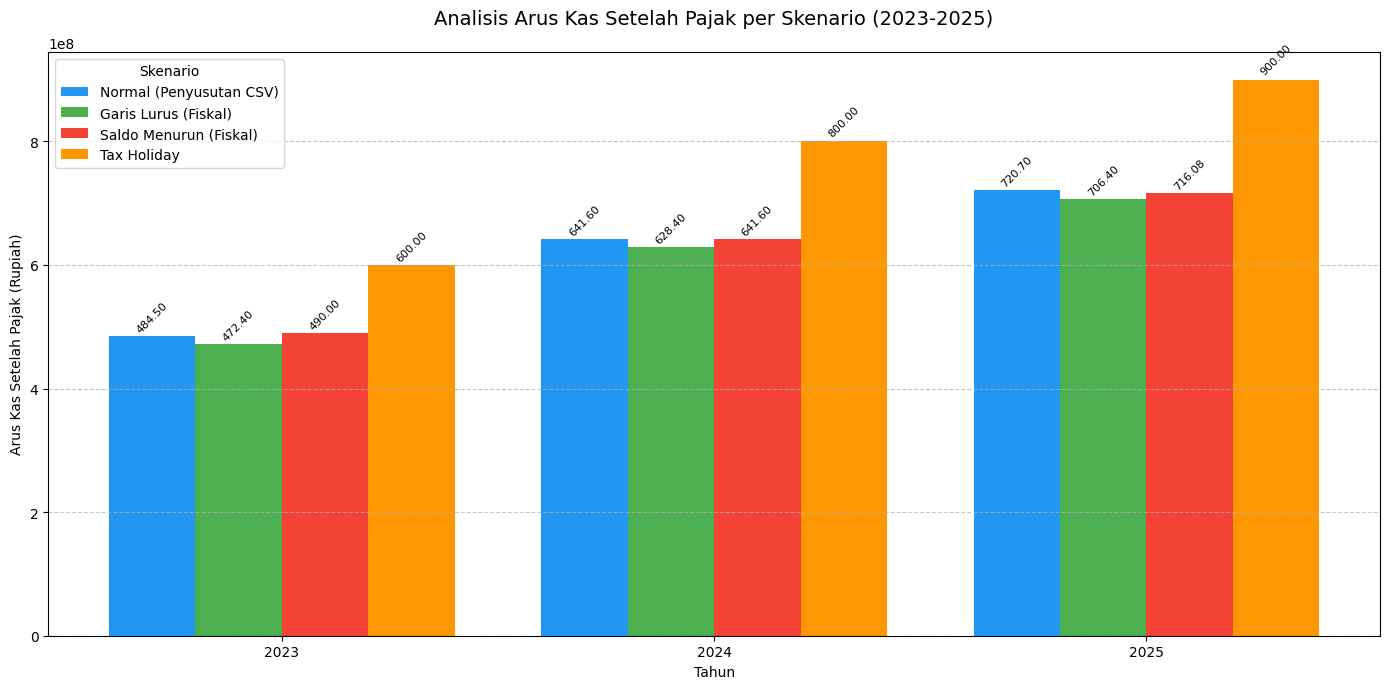

Diagram batang analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_batang.png'.
Hasil analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_simulasi.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Use provided data to create DataFrames instead of reading from CSV
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['Normal', 'Tax Holiday', 'Normal', 'Tax Holiday', 'Normal', 'Tax Holiday'] # Changed to match 'Normal' filter later
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}
# Dummy data for aset_tetap - ADJUST THIS BASED ON YOUR ACTUAL ASSET DATA
# This data is used to calculate fiscal depreciation for GL and SM scenarios
aset_data = {
    'nama_aset': ['Mesin A', 'Gedung B'],
    'nilai_perolehan': [100000000, 500000000],
    'umur_ekonomis': [5, 10],
    'metode': ['Garis Lurus', 'Saldo Menurun']
}

# Create DataFrames from dictionaries
transaksi = pd.DataFrame(transaksi_data)
aset = pd.DataFrame(aset_data)
fiskal = pd.DataFrame(kebijakan_data)

# Note: The previous calculations for 'laba_kotor' and 'laba_rugi_bersih'
# are not directly used for the Arus Kas calculation below, as Arus Kas
# is typically calculated as (Pendapatan - Beban Operasional - PPh) + Penyusutan (non-cash expense)
# OR more simply as Laba Kena Pajak * (1-Tax Rate) + Penyusutan Non-Fiskal (Accounting Depreciation) + Penyusutan Fiskal
# The logic below uses Pendapatan - Beban Operasional - PPh, which is also a valid way if Penyusutan Fiskal was already deducted from Beban Operasional.
# However, based on your previous code, 'beban_operasional' doesn't seem to include depreciation.
# Let's adjust the Arus Kas calculation to be (Pendapatan - Beban Operasional - Fiscal Depreciation - Taxable Adjustments) * (1-Tax Rate) + Fiscal Depreciation

# Let's refine the Arus Kas calculation. Arus Kas Setelah Pajak (AKSP) is generally:
# Net Income + Non-cash Expenses (like Depreciation) - Non-cash Revenues + Changes in Working Capital - Capital Expenditures + Net Borrowing
# A simplified AKSP (assuming no changes in working capital, no capital expenditures, no net borrowing) can be:
# Taxable Profit * (1 - Tax Rate) + Fiscal Depreciation
# Where Taxable Profit = Pendapatan - Beban Operasional - Fiscal Depreciation.

# Let's recalculate PPh and then AKSP based on the standard formula.

# 2. Filter data for different scenarios (needed for revenue/expense base)
# We will use the 'Normal' scenario data as the base financial performance,
# and then apply different depreciation and tax rules.
transaksi_base = transaksi[transaksi['skenario'] == 'Normal'].copy()

# 3. Menghitung penyusutan per aset untuk metode Garis Lurus dan Saldo Menurun (Fiskal)
aset_gl = aset[aset['metode'] == 'Garis Lurus'].copy()
aset_sm = aset[aset['metode'] == 'Saldo Menurun'].copy()

# Fungsi untuk menghitung penyusutan fiskal
# Simplified for this example based on asset data structure
def hitung_penyusutan_fiskal_gl(nilai_perolehan, umur_ekonomis):
    # Assuming full year depreciation for the asset's economic life
    return nilai_perolehan / umur_ekonomis

def hitung_penyusutan_fiskal_sm(nilai_buku, umur_ekonomis, tahun_ke):
    # Simplified declining balance: double the straight-line rate
    rate = (1 / umur_ekonomis) * 2
    # Depreciation = Beginning Book Value * Rate
    return nilai_buku * rate

# Menghitung penyusutan fiskal per tahun untuk semua aset
tahun_range = sorted(transaksi_base['tahun'].unique()) # Use years from your data

penyusutan_gl_per_tahun_fiskal = {tahun: 0 for tahun in tahun_range}
penyusutan_sm_per_tahun_fiskal = {tahun: 0 for tahun in tahun_range}

# Calculate total annual GL fiscal depreciation
for _, row in aset_gl.iterrows():
    penyusutan_tahunan = hitung_penyusutan_fiskal_gl(row['nilai_perolehan'], row['umur_ekonomis'])
    asset_life_years = row['umur_ekonomis']
    # Assuming assets acquired before the start of tahun_range
    # We need to consider which years the depreciation applies
    # For simplicity, assume depreciation starts in 2023 and lasts for umur_ekonomis
    start_year = 2023 # Assuming assets are 'active' from 2023
    end_year = start_year + asset_life_years - 1

    for tahun in tahun_range:
         if start_year <= tahun <= end_year:
             penyusutan_gl_per_tahun_fiskal[tahun] += penyusutan_tahunan

# Calculate annual SM fiscal depreciation, tracking book value per asset per year
sm_book_values = {row['nama_aset']: row['nilai_perolehan'] for _, row in aset_sm.iterrows()}
sm_start_year = 2023 # Assuming assets are 'active' from 2023

for tahun in tahun_range:
    for _, row in aset_sm.iterrows():
        asset_name = row['nama_aset']
        umur_ekonomis = row['umur_ekonomis']
        current_book_value = sm_book_values[asset_name]

        # Calculate depreciation only if still within economic life and book value > 0
        if tahun >= sm_start_year and (tahun - sm_start_year) < umur_ekonomis and current_book_value > 1:
            penyusutan_tahunan = min(hitung_penyusutan_fiskal_sm(current_book_value, umur_ekonomis, tahun - sm_start_year + 1), current_book_value - 1) # Ensure book value doesn't go below zero
            penyusutan_sm_per_tahun_fiskal[tahun] += penyusutan_tahunan
            sm_book_values[asset_name] -= penyusutan_tahunan # Update book value for the next year
        # else: penyusutan_sm_per_tahun_fiskal[tahun] remains 0 for this asset

# 4. Menghitung Arus Kas Setelah Pajak (AKSP) untuk setiap skenario
result = []
for tahun in tahun_range:
    # Ambil data base transaksi untuk tahun tertentu (menggunakan skenario Normal sebagai dasar pendapatan & beban)
    transaksi_tahun = transaksi_base[transaksi_base['tahun'] == tahun]
    if transaksi_tahun.empty:
        continue

    pendapatan = transaksi_tahun['pendapatan'].iloc[0]
    beban_operasional = transaksi_tahun['beban_operasional'].iloc[0]
    penyusutan_normal_akuntansi = transaksi_tahun['penyusutan'].iloc[0] # This is the accounting depreciation from your original data

    # Ambil tax rate dan periode tax holiday
    fiskal_tahun = fiskal[fiskal['tahun'] == tahun]
    if fiskal_tahun.empty:
        continue

    tax_rate = fiskal_tahun['tax_rate'].iloc[0]
    tax_holiday_awal = fiskal_tahun['tax_holiday_awal'].iloc[0]
    tax_holiday_akhir = fiskal_tahun['tax_holiday_akhir'].iloc[0]

    # --- Perhitungan AKSP per Skenario ---

    # Skenario Normal (menggunakan penyusutan akuntansi dari data transaksi sebagai penyusutan fiskal untuk perhitungan pajak)
    # Assuming the 'penyusutan' column in your original data represents the fiscal depreciation for the 'Normal' scenario calculation
    penyusutan_normal_fiskal = penyusutan_normal_akuntansi
    laba_kena_pajak_normal = pendapatan - beban_operasional - penyusutan_normal_fiskal
    pph_normal = laba_kena_pajak_normal * tax_rate if laba_kena_pajak_normal > 0 else 0
    # AKSP = Taxable Income * (1-Tax Rate) + Fiscal Depreciation OR Laba Kena Pajak - PPh + Fiscal Depreciation
    # Let's use Laba Kena Pajak - PPh + Fiscal Depreciation for clarity, which simplifies to Laba Setelah Pajak + Fiscal Depreciation
    laba_setelah_pajak_normal = laba_kena_pajak_normal - pph_normal
    arus_kas_normal = laba_setelah_pajak_normal + penyusutan_normal_fiskal

    # Skenario Garis Lurus (menggunakan penyusutan fiskal metode Garis Lurus yang dihitung)
    penyusutan_gl_fiskal = penyusutan_gl_per_tahun_fiskal.get(tahun, 0)
    laba_kena_pajak_gl = pendapatan - beban_operasional - penyusutan_gl_fiskal
    pph_gl = laba_kena_pajak_gl * tax_rate if laba_kena_pajak_gl > 0 else 0
    laba_setelah_pajak_gl = laba_kena_pajak_gl - pph_gl
    arus_kas_gl = laba_setelah_pajak_gl + penyusutan_gl_fiskal

    # Skenario Saldo Menurun (menggunakan penyusutan fiskal metode Saldo Menurun yang dihitung)
    penyusutan_sm_fiskal = penyusutan_sm_per_tahun_fiskal.get(tahun, 0)
    laba_kena_pajak_sm = pendapatan - beban_operasional - penyusutan_sm_fiskal
    pph_sm = laba_kena_pajak_sm * tax_rate if laba_kena_pajak_sm > 0 else 0
    laba_setelah_pajak_sm = laba_kena_pajak_sm - pph_sm
    arus_kas_sm = laba_setelah_pajak_sm + penyusutan_sm_fiskal

    # Skenario Tax Holiday (PPh 0 selama periode tax holiday, menggunakan penyusutan normal/akuntansi untuk perhitungan laba kena pajak jika tidak tax holiday)
    # During tax holiday, PPh is 0. Taxable Income is same as Normal (using penyusutan_normal_fiskal).
    # After tax holiday, PPh calculation is same as Normal scenario.
    is_tax_holiday_year = tax_holiday_awal <= tahun <= tax_holiday_akhir
    pph_th = 0 if is_tax_holiday_year else pph_normal # PPh is 0 during holiday, otherwise same as Normal PPh

    # AKSP for Tax Holiday: (Laba Kena Pajak Normal - PPh_TH) + Fiscal Depreciation (using Normal depreciation)
    laba_kena_pajak_th_base = pendapatan - beban_operasional - penyusutan_normal_fiskal
    laba_setelah_pajak_th = laba_kena_pajak_th_base - pph_th
    arus_kas_th = laba_setelah_pajak_th + penyusutan_normal_fiskal


    result.append({
        'tahun': tahun,
        'Arus_Kas_Normal': arus_kas_normal,
        'Arus_Kas_Garis_Lurus': arus_kas_gl,
        'Arus_Kas_Saldo_Menurun': arus_kas_sm,
        'Arus_Kas_Tax_Holiday': arus_kas_th
    })

# 5. Membuat DataFrame hasil
df_result = pd.DataFrame(result)
# Convert to millions for printing only, keep original values for plotting
df_result_milions = df_result.copy()
for col in ['Arus_Kas_Normal', 'Arus_Kas_Garis_Lurus', 'Arus_Kas_Saldo_Menurun', 'Arus_Kas_Tax_Holiday']:
    df_result_milions[col] = df_result_milions[col] / 1_000_000

print("Analisis Arus Kas Setelah Pajak (dalam jutaan rupiah):")
print(df_result_milions.set_index('tahun'))


# 6. Membuat diagram batang
plt.figure(figsize=(14, 7))
bar_width = 0.2
x = np.arange(len(df_result['tahun']))

# Plot batang untuk setiap skenario (using original large values for accurate plotting)
plt.bar(x - bar_width*1.5, df_result['Arus_Kas_Normal'], width=bar_width, label='Normal (Penyusutan CSV)', color='#2196F3')
plt.bar(x - bar_width*0.5, df_result['Arus_Kas_Garis_Lurus'], width=bar_width, label='Garis Lurus (Fiskal)', color='#4CAF50')
plt.bar(x + bar_width*0.5, df_result['Arus_Kas_Saldo_Menurun'], width=bar_width, label='Saldo Menurun (Fiskal)', color='#F44336')
plt.bar(x + bar_width*1.5, df_result['Arus_Kas_Tax_Holiday'], width=bar_width, label='Tax Holiday', color='#FF9800')

# Anotasi nilai di atas batang (use millions for display)
for i, tahun in enumerate(df_result['tahun']):
    for j, col in enumerate(['Arus_Kas_Normal', 'Arus_Kas_Garis_Lurus', 'Arus_Kas_Saldo_Menurun', 'Arus_Kas_Tax_Holiday']):
        value = df_result_milions[col].iloc[i] # Use millions DataFrame for text display
        plt.text(i + (bar_width * (j - 1.5)), # Adjust text position based on bar index
                 df_result[col].iloc[i] + (df_result[col].iloc[i] * 0.005), # Position text slightly above the bar using original value
                 f'{value:.2f}', ha='center', va='bottom', fontsize=8, rotation=45) # Rotate text for better readability

# Pengaturan diagram
plt.xlabel('Tahun')
plt.ylabel('Arus Kas Setelah Pajak (Rupiah)') # Changed back to Rupiah as values are large
plt.title('Analisis Arus Kas Setelah Pajak per Skenario (2023-2025)', fontsize=14, pad=20) # Adjusted year range and title
plt.xticks(x, df_result['tahun'])
plt.legend(title='Skenario', loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menyimpan diagram
plt.savefig('arus_kas_setelah_pajak_batang.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diagram batang analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_batang.png'.")

# 7. Menyimpan hasil tabel ke file CSV (optional)
df_result.to_csv('arus_kas_setelah_pajak_simulasi.csv', index=False)
print("Hasil analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_simulasi.csv'.")

Analisis Arus Kas Setelah Pajak (dalam jutaan rupiah):
       Arus_Kas_Normal  Arus_Kas_Garis_Lurus  Arus_Kas_Saldo_Menurun  \
tahun                                                                  
2023             484.5                 472.4                  490.00   
2024             641.6                 628.4                  641.60   
2025             720.7                 706.4                  716.08   

       Arus_Kas_Tax_Holiday  
tahun                        
2023                  600.0  
2024                  800.0  
2025                  900.0  


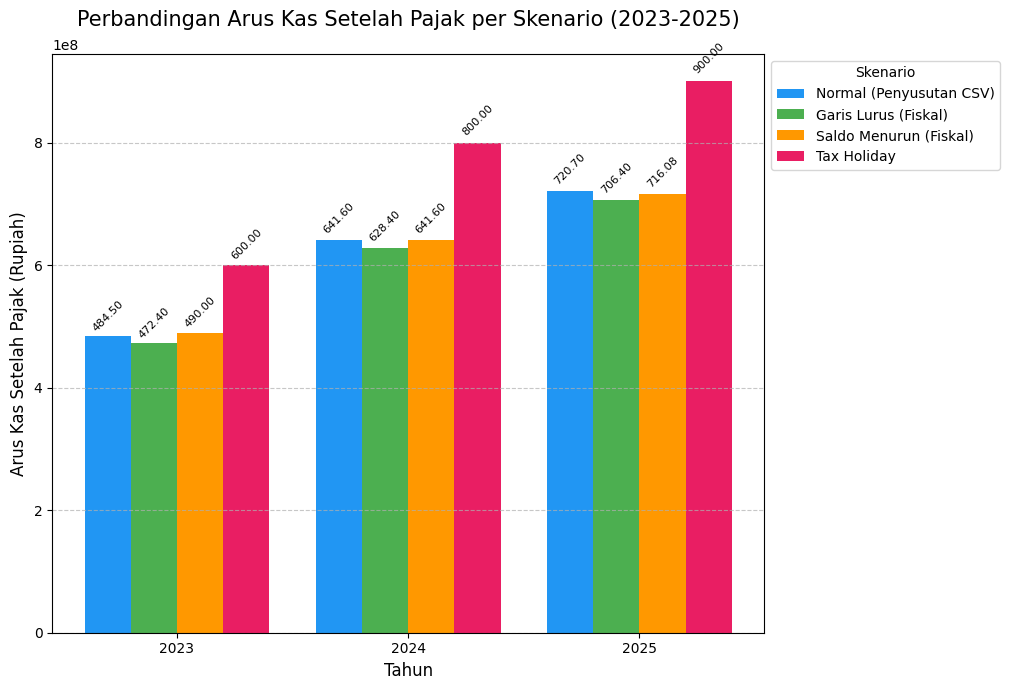

Diagram batang analisis arus kas setelah pajak (grouped) telah disimpan ke 'arus_kas_setelah_pajak_batang_grouped.png'.
Hasil analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_simulasi.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Tidak perlu modul 3D lagi

# 1. Use provided data to create DataFrames instead of reading from CSV
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['Normal', 'Tax Holiday', 'Normal', 'Tax Holiday', 'Normal', 'Tax Holiday'] # Changed to match 'Normal' filter later
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}
# Dummy data for aset_tetap - ADJUST THIS BASED ON YOUR ACTUAL ASSET DATA
# This data is used to calculate fiscal depreciation for GL and SM scenarios
aset_data = {
    'nama_aset': ['Mesin A', 'Gedung B'],
    'nilai_perolehan': [100000000, 500000000],
    'umur_ekonomis': [5, 10],
    'metode': ['Garis Lurus', 'Saldo Menurun']
}

# Create DataFrames from dictionaries
transaksi = pd.DataFrame(transaksi_data)
aset = pd.DataFrame(aset_data)
fiskal = pd.DataFrame(kebijakan_data)

# Note: The previous calculations for 'laba_kotor' and 'laba_rugi_bersih'
# are not directly used for the Arus Kas calculation below, as Arus Kas
# is typically calculated as (Pendapatan - Beban Operasional - PPh) + Penyusutan (non-cash expense)
# OR more simply as Laba Kena Pajak * (1-Tax Rate) + Penyusutan Non-Fiskal (Accounting Depreciation) + Penyusutan Fiskal
# The logic below uses Pendapatan - Beban Operasional - PPh, which is also a valid way if Penyusutan Fiskal was already deducted from Beban Operasional.
# However, based on your previous code, 'beban_operasional' doesn't seem to include depreciation.
# Let's adjust the Arus Kas calculation to be (Pendapatan - Beban Operasional - Fiscal Depreciation - Taxable Adjustments) * (1-Tax Rate) + Fiscal Depreciation

# Let's refine the Arus Kas calculation. Arus Kas Setelah Pajak (AKSP) is generally:
# Net Income + Non-cash Expenses (like Depreciation) - Non-cash Revenues + Changes in Working Capital - Capital Expenditures + Net Borrowing
# A simplified AKSP (assuming no changes in working capital, no capital expenditures, no net borrowing) can be:
# Taxable Profit * (1 - Tax Rate) + Fiscal Depreciation
# Where Taxable Profit = Pendapatan - Beban Operasional - Fiscal Depreciation.

# Let's recalculate PPh and then AKSP based on the standard formula.

# 2. Filter data for different scenarios (needed for revenue/expense base)
# We will use the 'Normal' scenario data as the base financial performance,
# and then apply different depreciation and tax rules.
transaksi_base = transaksi[transaksi['skenario'] == 'Normal'].copy()

# 3. Menghitung penyusutan per aset untuk metode Garis Lurus dan Saldo Menurun (Fiskal)
aset_gl = aset[aset['metode'] == 'Garis Lurus'].copy()
aset_sm = aset[aset['metode'] == 'Saldo Menurun'].copy()

# Fungsi untuk menghitung penyusutan fiskal
# Simplified for this example based on asset data structure
def hitung_penyusutan_fiskal_gl(nilai_perolehan, umur_ekonomis):
    # Assuming full year depreciation for the asset's economic life
    if umur_ekonomis > 0:
        return nilai_perolehan / umur_ekonomis
    return 0

def hitung_penyusutan_fiskal_sm(nilai_buku, umur_ekonomis, tahun_ke):
    # Simplified declining balance: double the straight-line rate
    if umur_ekonomis > 0:
        rate = (1 / umur_ekonomis) * 2
        # Depreciation = Beginning Book Value * Rate
        return nilai_buku * rate
    return 0

# Menghitung penyusutan fiskal per tahun untuk semua aset
tahun_range = sorted(transaksi_base['tahun'].unique()) # Use years from your data

penyusutan_gl_per_tahun_fiskal = {tahun: 0 for tahun in tahun_range}
penyusutan_sm_per_tahun_fiskal = {tahun: 0 for tahun in tahun_range}

# Calculate total annual GL fiscal depreciation
for _, row in aset_gl.iterrows():
    penyusutan_tahunan = hitung_penyusutan_fiskal_gl(row['nilai_perolehan'], row['umur_ekonomis'])
    asset_life_years = row['umur_ekonomis']
    # Assuming assets acquired before the start of tahun_range
    # We need to consider which years the depreciation applies
    # For simplicity, assume depreciation starts in 2023 and lasts for umur_ekonomis
    start_year = 2023 # Assuming assets are 'active' from 2023
    end_year = start_year + asset_life_years - 1

    for tahun in tahun_range:
         if start_year <= tahun <= end_year:
             penyusutan_gl_per_tahun_fiskal[tahun] += penyusutan_tahunan

# Calculate annual SM fiscal depreciation, tracking book value per asset per year
sm_book_values = {row['nama_aset']: row['nilai_perolehan'] for _, row in aset_sm.iterrows()}
sm_start_year = 2023 # Assuming assets are 'active' from 2023

for tahun in tahun_range:
    for _, row in aset_sm.iterrows():
        asset_name = row['nama_aset']
        umur_ekonomis = row['umur_ekonomis']
        current_book_value = sm_book_values[asset_name]

        # Calculate depreciation only if still within economic life and book value > 1
        if tahun >= sm_start_year and (tahun - sm_start_year) < umur_ekonomis and current_book_value > 1:
            penyusutan_tahunan = min(hitung_penyusutan_fiskal_sm(current_book_value, umur_ekonomis, tahun - sm_start_year + 1), current_book_value - 1) # Ensure book value doesn't go below zero
            penyusutan_sm_per_tahun_fiskal[tahun] += penyusutan_tahunan
            sm_book_values[asset_name] -= penyusutan_tahunan # Update book value for the next year
        # else: penyusutan_sm_per_tahun_fiskal[tahun] remains 0 for this asset


# 4. Menghitung Arus Kas Setelah Pajak (AKSP) untuk setiap skenario
result = []
for tahun in tahun_range:
    # Ambil data base transaksi untuk tahun tertentu (menggunakan skenario Normal sebagai dasar pendapatan & beban)
    transaksi_tahun = transaksi_base[transaksi_base['tahun'] == tahun]
    if transaksi_tahun.empty:
        continue

    pendapatan = transaksi_tahun['pendapatan'].iloc[0]
    beban_operasional = transaksi_tahun['beban_operasional'].iloc[0]
    # Penyusutan akuntansi dari data transaksi, digunakan untuk Skenario Normal AKSP calculation (assuming this was accounting depreciation)
    penyusutan_akuntansi = transaksi_tahun['penyusutan'].iloc[0]


    # Ambil tax rate dan periode tax holiday
    fiskal_tahun = fiskal[fiskal['tahun'] == tahun]
    if fiskal_tahun.empty:
        continue

    tax_rate = fiskal_tahun['tax_rate'].iloc[0]
    tax_holiday_awal = fiskal_tahun['tax_holiday_awal'].iloc[0]
    tax_holiday_akhir = fiskal_tahun['tax_holiday_akhir'].iloc[0]

    # --- Perhitungan AKSP per Skenario ---

    # Skenario Normal (menggunakan penyusutan akuntansi dari data transaksi sebagai penyusutan fiskal untuk perhitungan pajak)
    # Assuming the 'penyusutan' column in your original data represents the fiscal depreciation for the 'Normal' scenario calculation
    penyusutan_normal_fiskal = penyusutan_akuntansi
    laba_kena_pajak_normal = pendapatan - beban_operasional - penyusutan_normal_fiskal
    pph_normal = laba_kena_pajak_normal * tax_rate if laba_kena_pajak_normal > 0 else 0
    # AKSP = Laba Setelah Pajak + Fiscal Depreciation
    laba_setelah_pajak_normal = laba_kena_pajak_normal - pph_normal
    arus_kas_normal = laba_setelah_pajak_normal + penyusutan_normal_fiskal

    # Skenario Garis Lurus (menggunakan penyusutan fiskal metode Garis Lurus yang dihitung)
    penyusutan_gl_fiskal = penyusutan_gl_per_tahun_fiskal.get(tahun, 0)
    laba_kena_pajak_gl = pendapatan - beban_operasional - penyusutan_gl_fiskal
    pph_gl = laba_kena_pajak_gl * tax_rate if laba_kena_pajak_gl > 0 else 0
    laba_setelah_pajak_gl = laba_kena_pajak_gl - pph_gl
    arus_kas_gl = laba_setelah_pajak_gl + penyusutan_gl_fiskal

    # Skenario Saldo Menurun (menggunakan penyusutan fiskal metode Saldo Menurun yang dihitung)
    penyusutan_sm_fiskal = penyusutan_sm_per_tahun_fiskal.get(tahun, 0)
    laba_kena_pajak_sm = pendapatan - beban_operasional - penyusutan_sm_fiskal
    pph_sm = laba_kena_pajak_sm * tax_rate if laba_kena_pajak_sm > 0 else 0
    laba_setelah_pajak_sm = laba_kena_pajak_sm - pph_sm
    arus_kas_sm = laba_setelah_pajak_sm + penyusutan_sm_fiskal


    # Skenario Tax Holiday (PPh 0 selama periode tax holiday, menggunakan penyusutan normal/akuntansi untuk perhitungan laba kena pajak jika tidak tax holiday)
    is_tax_holiday_year = tax_holiday_awal <= tahun <= tax_holiday_akhir
    pph_th = 0 if is_tax_holiday_year else pph_normal # PPh is 0 during holiday, otherwise same as Normal PPh
    # AKSP for Tax Holiday: (Laba Kena Pajak Normal - PPh_TH) + Fiscal Depreciation (using Normal depreciation)
    laba_kena_pajak_th_base = pendapatan - beban_operasional - penyusutan_normal_fiskal # Use normal fiscal dep base for tax calculation
    laba_setelah_pajak_th = laba_kena_pajak_th_base - pph_th
    # AKSP includes the depreciation add-back, which for the Tax Holiday scenario
    # is assumed to be the same as the Normal scenario's fiscal depreciation for consistency
    arus_kas_th = laba_setelah_pajak_th + penyusutan_normal_fiskal


    result.append({
        'tahun': tahun,
        'Arus_Kas_Normal': arus_kas_normal,
        'Arus_Kas_Garis_Lurus': arus_kas_gl,
        'Arus_Kas_Saldo_Menurun': arus_kas_sm,
        'Arus_Kas_Tax_Holiday': arus_kas_th
    })

# 5. Membuat DataFrame hasil
df_result = pd.DataFrame(result)
# Convert to millions for printing only, keep original values for plotting
df_result_milions = df_result.copy()
for col in ['Arus_Kas_Normal', 'Arus_Kas_Garis_Lurus', 'Arus_Kas_Saldo_Menurun', 'Arus_Kas_Tax_Holiday']:
    df_result_milions[col] = df_result_milions[col] / 1_000_000

print("Analisis Arus Kas Setelah Pajak (dalam jutaan rupiah):")
print(df_result_milions.set_index('tahun'))


# 6. Membuat diagram batang yang lebih mudah dipahami (grouped bar chart)
plt.figure(figsize=(12, 7)) # Ukuran figure yang lebih proporsional
bar_width = 0.2 # Lebar batang
years = df_result['tahun']
x = np.arange(len(years))  # Posisi sumbu X untuk setiap tahun

# Plot batang untuk setiap skenario
plt.bar(x - bar_width*1.5, df_result['Arus_Kas_Normal'], width=bar_width, label='Normal (Penyusutan CSV)', color='#2196F3') # Biru cerah
plt.bar(x - bar_width*0.5, df_result['Arus_Kas_Garis_Lurus'], width=bar_width, label='Garis Lurus (Fiskal)', color='#4CAF50') # Hijau
plt.bar(x + bar_width*0.5, df_result['Arus_Kas_Saldo_Menurun'], width=bar_width, label='Saldo Menurun (Fiskal)', color='#FF9800') # Oranye
plt.bar(x + bar_width*1.5, df_result['Arus_Kas_Tax_Holiday'], width=bar_width, label='Tax Holiday', color='#E91E63') # Merah muda/ungu


# Anotasi nilai di atas batang (gunakan nilai jutaan untuk tampilan)
for i, tahun in enumerate(years):
    for j, col in enumerate(['Arus_Kas_Normal', 'Arus_Kas_Garis_Lurus', 'Arus_Kas_Saldo_Menurun', 'Arus_Kas_Tax_Holiday']):
        value = df_result_milions[col].iloc[i] # Nilai dalam jutaan untuk anotasi
        # Hitung posisi X teks
        text_x_position = x[i] + (bar_width * (j - 1.5)) # Posisi X sesuai dengan tengah bar
        # Posisi Y teks (sedikit di atas bar)
        text_y_position = df_result[col].iloc[i] + (df_result[col].iloc[i] * 0.01) if df_result[col].iloc[i] > 0 else df_result[col].iloc[i] - (df_result[col].iloc[i] * 0.01) # Sedikit di atas atau di bawah bar

        plt.text(text_x_position,
                 text_y_position,
                 f'{value:.2f}', # Format ke 2 desimal
                 ha='center',
                 va='bottom' if df_result[col].iloc[i] > 0 else 'top', # Anotasi di atas bar positif, di bawah bar negatif
                 fontsize=8,
                 rotation=45) # Rotasi teks agar tidak bertumpuk


# Pengaturan diagram
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Arus Kas Setelah Pajak (Rupiah)', fontsize=12) # Label sumbu Y jelas
plt.title('Perbandingan Arus Kas Setelah Pajak per Skenario (2023-2025)', fontsize=15, pad=20) # Judul yang jelas
plt.xticks(x, years.astype(int)) # Gunakan tahun sebagai integer untuk tick X
plt.legend(title='Skenario', loc='upper left', bbox_to_anchor=(1, 1)) # Legenda di luar plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7) # Grid hanya di sumbu Y
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Sesuaikan layout untuk memberi ruang legenda

# Menyimpan diagram
plt.savefig('arus_kas_setelah_pajak_batang_grouped.png', dpi=300, bbox_inches='tight')
plt.show()

print("Diagram batang analisis arus kas setelah pajak (grouped) telah disimpan ke 'arus_kas_setelah_pajak_batang_grouped.png'.")

# 7. Menyimpan hasil tabel ke file CSV (optional)
df_result.to_csv('arus_kas_setelah_pajak_simulasi.csv', index=False)
print("Hasil analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_simulasi.csv'.")

Analisis Arus Kas Setelah Pajak (dalam jutaan rupiah):
       Arus_Kas_Normal  Arus_Kas_Garis_Lurus  Arus_Kas_Saldo_Menurun  \
tahun                                                                  
2023             484.5                 472.4                  490.00   
2024             641.6                 628.4                  641.60   
2025             720.7                 706.4                  716.08   

       Arus_Kas_Tax_Holiday  
tahun                        
2023                  600.0  
2024                  800.0  
2025                  900.0  


<ipython-input-28-4f222019925c>:275: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 0.8, 1]) # Sesuaikan layout untuk memberi ruang legenda


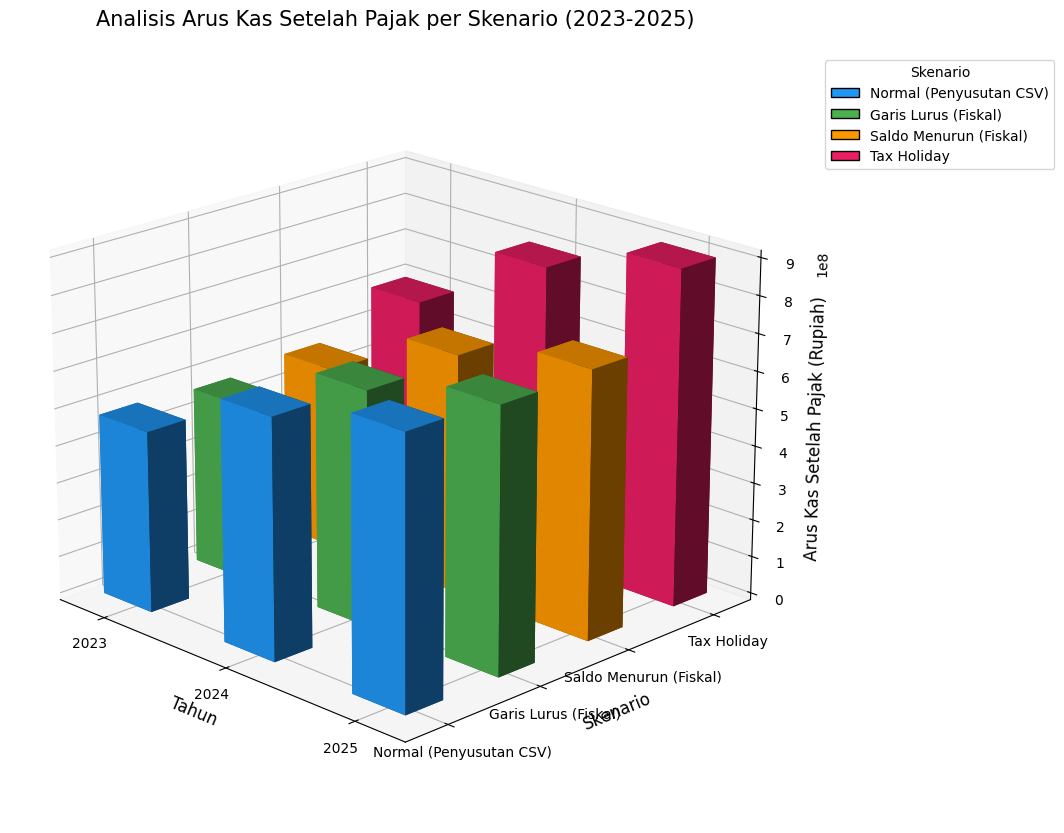


Diagram batang 3D analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_batang_3d.png'.
Hasil analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_simulasi.csv'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import modul untuk plot 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch # Import Patch for proxy artists

# 1. Use provided data to create DataFrames instead of reading from CSV
transaksi_data = {
    'tahun': [2023, 2023, 2024, 2024, 2025, 2025],
    'pendapatan': [1500000000, 1500000000, 1800000000, 1800000000, 2000000000, 2000000000],
    'beban_operasional': [900000000, 900000000, 1000000000, 1000000000, 1100000000, 1100000000],
    'penyusutan': [75000000, 75000000, 80000000, 80000000, 85000000, 85000000],
    'skenario': ['Normal', 'Tax Holiday', 'Normal', 'Tax Holiday', 'Normal', 'Tax Holiday'] # Changed to match 'Normal' filter later
}
kebijakan_data = {
    'tahun': [2023, 2024, 2025],
    'tax_rate': [0.22, 0.22, 0.22],
    'tax_holiday_awal': [2023, 2023, 2023],
    'tax_holiday_akhir': [2025, 2025, 2025]
}
# Dummy data for aset_tetap - ADJUST THIS BASED ON YOUR ACTUAL ASSET DATA
# This data is used to calculate fiscal depreciation for GL and SM scenarios
aset_data = {
    'nama_aset': ['Mesin A', 'Gedung B'],
    'nilai_perolehan': [100000000, 500000000],
    'umur_ekonomis': [5, 10],
    'metode': ['Garis Lurus', 'Saldo Menurun']
}

# Create DataFrames from dictionaries
transaksi = pd.DataFrame(transaksi_data)
aset = pd.DataFrame(aset_data)
fiskal = pd.DataFrame(kebijakan_data)

# Let's recalculate PPh and then AKSP based on the standard formula.

# 2. Filter data for different scenarios (needed for revenue/expense base)
# We will use the 'Normal' scenario data as the base financial performance,
# and then apply different depreciation and tax rules.
transaksi_base = transaksi[transaksi['skenario'] == 'Normal'].copy()

# 3. Menghitung penyusutan per aset untuk metode Garis Lurus dan Saldo Menurun (Fiskal)
aset_gl = aset[aset['metode'] == 'Garis Lurus'].copy()
aset_sm = aset[aset['metode'] == 'Saldo Menurun'].copy()

# Fungsi untuk menghitung penyusutan fiskal
# Simplified for this example based on asset data structure
def hitung_penyusutan_fiskal_gl(nilai_perolehan, umur_ekonomis):
    # Assuming full year depreciation for the asset's economic life
    if umur_ekonomis > 0:
        return nilai_perolehan / umur_ekonomis
    return 0

def hitung_penyusutan_fiskal_sm(nilai_buku, umur_ekonomis, tahun_ke):
    # Simplified declining balance: double the straight-line rate
    if umur_ekonomis > 0:
        rate = (1 / umur_ekonomis) * 2
        # Depreciation = Beginning Book Value * Rate
        return nilai_buku * rate
    return 0

# Menghitung penyusutan fiskal per tahun untuk semua aset
tahun_range = sorted(transaksi_base['tahun'].unique()) # Use years from your data

penyusutan_gl_per_tahun_fiskal = {tahun: 0 for tahun in tahun_range}
penyusutan_sm_per_tahun_fiskal = {tahun: 0 for tahun in tahun_range}

# Calculate total annual GL fiscal depreciation
for _, row in aset_gl.iterrows():
    penyusutan_tahunan = hitung_penyusutan_fiskal_gl(row['nilai_perolehan'], row['umur_ekonomis'])
    asset_life_years = row['umur_ekonomis']
    # Assuming assets acquired before the start of tahun_range
    # We need to consider which years the depreciation applies
    # For simplicity, assume depreciation starts in 2023 and lasts for umur_ekonomis
    start_year = 2023 # Assuming assets are 'active' from 2023
    end_year = start_year + asset_life_years - 1

    for tahun in tahun_range:
         if start_year <= tahun <= end_year:
             penyusutan_gl_per_tahun_fiskal[tahun] += penyusutan_tahunan

# Calculate annual SM fiscal depreciation, tracking book value per asset per year
sm_book_values = {row['nama_aset']: row['nilai_perolehan'] for _, row in aset_sm.iterrows()}
sm_start_year = 2023 # Assuming assets are 'active' from 2023

for tahun in tahun_range:
    for _, row in aset_sm.iterrows():
        asset_name = row['nama_aset']
        umur_ekonomis = row['umur_ekonomis']
        current_book_value = sm_book_values[asset_name]

        # Calculate depreciation only if still within economic life and book value > 1
        if tahun >= sm_start_year and (tahun - sm_start_year) < umur_ekonomis and current_book_value > 1:
            penyusutan_tahunan = min(hitung_penyusutan_fiskal_sm(current_book_value, umur_ekonomis, tahun - sm_start_year + 1), current_book_value - 1) # Ensure book value doesn't go below zero
            penyusutan_sm_per_tahun_fiskal[tahun] += penyusutan_tahunan
            sm_book_values[asset_name] -= penyusutan_tahunan # Update book value for the next year
        # else: penyusutan_sm_per_tahun_fiskal[tahun] remains 0 for this asset


# 4. Menghitung Arus Kas Setelah Pajak (AKSP) untuk setiap skenario
result = []
for tahun in tahun_range:
    # Ambil data base transaksi untuk tahun tertentu (menggunakan skenario Normal sebagai dasar pendapatan & beban)
    transaksi_tahun = transaksi_base[transaksi_base['tahun'] == tahun]
    if transaksi_tahun.empty:
        continue

    pendapatan = transaksi_tahun['pendapatan'].iloc[0]
    beban_operasional = transaksi_tahun['beban_operasional'].iloc[0]
    # Penyusutan akuntansi dari data transaksi, digunakan untuk Skenario Normal AKSP calculation (assuming this was accounting depreciation)
    penyusutan_akuntansi = transaksi_tahun['penyusutan'].iloc[0]


    # Ambil tax rate dan periode tax holiday
    fiskal_tahun = fiskal[fiskal['tahun'] == tahun]
    if fiskal_tahun.empty:
        continue

    tax_rate = fiskal_tahun['tax_rate'].iloc[0]
    tax_holiday_awal = fiskal_tahun['tax_holiday_awal'].iloc[0]
    tax_holiday_akhir = fiskal_tahun['tax_holiday_akhir'].iloc[0]

    # --- Perhitungan AKSP per Skenario ---

    # Skenario Normal (menggunakan penyusutan akuntansi dari data transaksi sebagai penyusutan fiskal untuk perhitungan pajak)
    # Assuming the 'penyusutan' column in your original data represents the fiscal depreciation for the 'Normal' scenario calculation
    penyusutan_normal_fiskal = penyusutan_akuntansi
    laba_kena_pajak_normal = pendapatan - beban_operasional - penyusutan_normal_fiskal
    pph_normal = laba_kena_pajak_normal * tax_rate if laba_kena_pajak_normal > 0 else 0
    # AKSP = Laba Setelah Pajak + Fiscal Depreciation
    laba_setelah_pajak_normal = laba_kena_pajak_normal - pph_normal
    arus_kas_normal = laba_setelah_pajak_normal + penyusutan_normal_fiskal

    # Skenario Garis Lurus (menggunakan penyusutan fiskal metode Garis Lurus yang dihitung)
    penyusutan_gl_fiskal = penyusutan_gl_per_tahun_fiskal.get(tahun, 0)
    laba_kena_pajak_gl = pendapatan - beban_operasional - penyusutan_gl_fiskal
    pph_gl = laba_kena_pajak_gl * tax_rate if laba_kena_pajak_gl > 0 else 0
    laba_setelah_pajak_gl = laba_kena_pajak_gl - pph_gl
    arus_kas_gl = laba_setelah_pajak_gl + penyusutan_gl_fiskal

    # Skenario Saldo Menurun (menggunakan penyusutan fiskal metode Saldo Menurun yang dihitung)
    penyusutan_sm_fiskal = penyusutan_sm_per_tahun_fiskal.get(tahun, 0)
    laba_kena_pajak_sm = pendapatan - beban_operasional - penyusutan_sm_fiskal
    pph_sm = laba_kena_pajak_sm * tax_rate if laba_kena_pajak_sm > 0 else 0
    laba_setelah_pajak_sm = laba_kena_pajak_sm - pph_sm
    arus_kas_sm = laba_setelah_pajak_sm + penyusutan_sm_fiskal


    # Skenario Tax Holiday (PPh 0 selama periode tax holiday, menggunakan penyusutan normal/akuntansi untuk perhitungan laba kena pajak jika tidak tax holiday)
    is_tax_holiday_year = tax_holiday_awal <= tahun <= tax_holiday_akhir
    pph_th = 0 if is_tax_holiday_year else pph_normal # PPh is 0 during holiday, otherwise same as Normal PPh
    # AKSP for Tax Holiday: (Laba Kena Pajak Normal - PPh_TH) + Fiscal Depreciation (using Normal depreciation)
    laba_kena_pajak_th_base = pendapatan - beban_operasional - penyusutan_normal_fiskal # Use normal fiscal dep base for tax calculation
    laba_setelah_pajak_th = laba_kena_pajak_th_base - pph_th
    # AKSP includes the depreciation add-back, which for the Tax Holiday scenario
    # is assumed to be the same as the Normal scenario's fiscal depreciation for consistency
    arus_kas_th = laba_setelah_pajak_th + penyusutan_normal_fiskal


    result.append({
        'tahun': tahun,
        'Arus_Kas_Normal': arus_kas_normal,
        'Arus_Kas_Garis_Lurus': arus_kas_gl,
        'Arus_Kas_Saldo_Menurun': arus_kas_sm,
        'Arus_Kas_Tax_Holiday': arus_kas_th
    })

# 5. Membuat DataFrame hasil
df_result = pd.DataFrame(result)
# Convert to millions for printing only, keep original values for plotting
df_result_milions = df_result.copy()
for col in ['Arus_Kas_Normal', 'Arus_Kas_Garis_Lurus', 'Arus_Kas_Saldo_Menurun', 'Arus_Kas_Tax_Holiday']:
    df_result_milions[col] = df_result_milions[col] / 1_000_000

print("Analisis Arus Kas Setelah Pajak (dalam jutaan rupiah):")
print(df_result_milions.set_index('tahun'))

# --- Bagian Visualisasi 3D ---

# 6. Membuat diagram batang 3D
years = df_result['tahun'].unique()
# Gunakan nama kolom AKSP sebagai 'skenario' di plot 3D
scenarios = ['Arus_Kas_Normal', 'Arus_Kas_Garis_Lurus', 'Arus_Kas_Saldo_Menurun', 'Arus_Kas_Tax_Holiday']
n_years = len(years)
n_scenarios = len(scenarios)

# Membuat figure dan axes untuk plot 3D
fig = plt.figure(figsize=(14, 10))
# Menggunakan 'projection='3d'' untuk membuat sumbu 3D
ax = fig.add_subplot(111, projection='3d')

# Menentukan posisi bar untuk setiap tahun di sumbu X
xpos = np.arange(n_years)
# Menentukan posisi bar untuk setiap skenario di sumbu Y
ypos = np.arange(n_scenarios)

# Membuat grid untuk posisi bar (X, Y)
xpos_grid, ypos_grid = np.meshgrid(xpos, ypos, indexing='ij')
xpos_flat = xpos_grid.flatten()
ypos_flat = ypos_grid.flatten()

# Menentukan tinggi bar (nilai Arus Kas Setelah Pajak)
zpos = 0 # Batang dimulai dari Z=0
# Mengambil nilai AKSP dari df_result, diubah menjadi array numpy datar, diurutkan sesuai grid
# Kita perlu memastikan urutan nilai AKSP sesuai dengan urutan xpos_flat dan ypos_flat
# xpos_flat berulang berdasarkan tahun, ypos_flat berulang berdasarkan skenario
# Kita bisa mengambil nilai AKSP dari df_result untuk setiap tahun dan setiap skenario secara terpisah
dz = np.zeros(n_years * n_scenarios)
colors_flat = []
scenario_labels = ['Normal (Penyusutan CSV)', 'Garis Lurus (Fiskal)', 'Saldo Menurun (Fiskal)', 'Tax Holiday']
scenario_colors_map = {
    'Arus_Kas_Normal': '#2196F3',  # Biru
    'Arus_Kas_Garis_Lurus': '#4CAF50', # Hijau
    'Arus_Kas_Saldo_Menurun': '#FF9800', # Oranye
    'Arus_Kas_Tax_Holiday': '#E91E63' # Merah muda/ungu
}

k = 0
for i in range(n_years):
    for j in range(n_scenarios):
        scenario_col = scenarios[j]
        # Ambil nilai AKSP untuk tahun i dan skenario j
        dz[k] = df_result[scenario_col].iloc[i]
        colors_flat.append(scenario_colors_map[scenario_col])
        k += 1

# Menentukan lebar bar di sumbu X dan Y
dx_bar = 0.4
dy_bar = 0.4

# Membuat bar 3D
# Parameters: x, y, z (base position), dx, dy, dz (dimensions)
# dx menentukan lebar bar di sumbu X (tahun)
# dy menentukan lebar bar di sumbu Y (skenario)
# dz menentukan tinggi bar
ax.bar3d(xpos_flat,
         ypos_flat,
         zpos, # Z base position (usually 0)
         dx=dx_bar,  # Lebar bar di sumbu X (tahun)
         dy=dy_bar,  # Lebar bar di sumbu Y (skenario)
         dz=dz,   # Tinggi bar (nilai AKSP)
         color=colors_flat,
         shade=True) # Memberikan efek bayangan

# Mengatur label dan judul
ax.set_xlabel('Tahun', fontsize=12)
ax.set_ylabel('Skenario', fontsize=12)
ax.set_zlabel('Arus Kas Setelah Pajak (Rupiah)', fontsize=12) # Label sumbu Z jelas
ax.set_title('Analisis Arus Kas Setelah Pajak per Skenario (2023-2025)', fontsize=15, pad=20) # Judul yang jelas

# Mengatur tick di sumbu X (Tahun)
# Sesuaikan posisi tick agar di tengah grup bar untuk setiap tahun
ax.set_xticks(xpos + dy_bar/2) # Offset tick X
ax.set_xticklabels(years.astype(int))

# Mengatur tick di sumbu Y (Skenario)
# Sesuaikan posisi tick agar di tengah bar untuk setiap skenario
ax.set_yticks(ypos + dx_bar/2) # Offset tick Y
ax.set_yticklabels(scenario_labels) # Menggunakan label yang lebih mudah dibaca


# Menambahkan grid di sumbu Z
ax.zaxis.grid(True, linestyle='--', alpha=0.7)

# Menambahkan legenda menggunakan proxy artists
legend_elements = [Patch(facecolor=scenario_colors_map[scenarios[i]], edgecolor='black', label=scenario_labels[i]) for i in range(n_scenarios)]
# Posisikan legenda di luar plot untuk menghindari tumpang tindih
ax.legend(handles=legend_elements, title='Skenario', loc='upper left', bbox_to_anchor=(1.05, 1))


# Mengatur sudut pandang (opsional, sesuaikan agar terlihat lebih baik)
ax.view_init(elev=20, azim=-45) # elev=elevasi, azim=azimut (sesuaikan sesuai preferensi)

plt.tight_layout(rect=[0, 0, 0.8, 1]) # Sesuaikan layout untuk memberi ruang legenda

# Menyimpan grafik ke file
plt.savefig('arus_kas_setelah_pajak_batang_3d.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDiagram batang 3D analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_batang_3d.png'.")

# 7. Menyimpan hasil tabel ke file CSV (optional)
df_result.to_csv('arus_kas_setelah_pajak_simulasi.csv', index=False)
print("Hasil analisis arus kas setelah pajak telah disimpan ke 'arus_kas_setelah_pajak_simulasi.csv'.")